## MSDS696 Data Science Practicum II
### Clustering and Linear Regression with Real Estate Data
### Part 1d - Douglas County Assessors Data Clustering

The data I am using for this project comes from the Douglas County Assessors Website.

  -  https://www.douglas.co.us/assessor/data-downloads/
  
The data I will be using is from Part 1b of my project - df_prop_analy_prim_imputed.

I am going to be running the analysis on features that I am interested in for a property.

### Libraries and Settings

In [1]:
# import the libraries needed

import pandas as pd # library for data analysis and manipulation
import numpy as np # library for working with arrays
import seaborn as sns; sns.set() # data visualization library based on matplotlib used for plot styling
import matplotlib.pyplot as plt # data visualization library
from sklearn.cluster import AgglomerativeClustering # Library for hierarchical clustering
from sklearn.cluster import DBSCAN # DBSCAN for clustering
from sklearn.cluster import KMeans # library for k-means clustering
from sklearn.decomposition import PCA # library for principle component analysis
from sklearn.neighbors import NearestNeighbors # used for dbscan tuning
from sklearn.datasets import make_blobs # used to make dataset
from sklearn import metrics # for cluster algorithm evaluation
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score # score for clustering 
from sklearn.metrics import pairwise_distances  # for cluster algorithm evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # scale data
from sklearn.preprocessing import LabelEncoder # encode data
from sklearn.pipeline import Pipeline # Create a pipline
from sklearn.linear_model import LassoCV # Feature Selection
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage # for Hierarchical Clustering
from kneed import KneeLocator # used for clustering to find optimal # of clusters
import requests
import json
import urllib
#import geopandas # geocode location
#import geopy # geocode location
from sklearn.impute import KNNImputer # used to impute Nan values
# line magic function, display the plot directly below code that produces it
%matplotlib inline 

In [2]:
# Set the option in pandas to display up to 150 columns and rows
pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', None)

### Read in Cleaned Data Files

In [3]:
# Read the .csv file into a dataframe
df_PR = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_prop_analy_prim_imputed.csv')

In [4]:
#read the location .csv file into a pandas dataframe
df_LOC = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_property_location.csv')

### Review Shape and Description of dataframes

In [5]:
# View the shape of the dataframe
df_PR.shape

(101817, 26)

In [6]:
# View the first few records of the df
df_PR.head()

Unnamed: 0  index  Built_As_code  No_of_Fireplace  Total_Garage_SF  \
0           0    0.0            1.0              0.0              0.0   
1           1    1.0            1.0              0.0            379.0   
2           2    2.0            5.0              0.0            900.0   
3           3    3.0            1.0              1.0            768.0   
4           4    4.0            1.0              0.0              0.0   

   Total_Porch_SF  Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0            98.0                         0.0                           0.0   
1           388.0                         0.0                           0.0   
2           463.0                       456.0                          34.0   
3           598.0                         0.0                           0.0   
4             0.0                         0.0                           0.0   

   Built_as_SF  No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0        969.0          1.0             2.0              1.0      1957.0   
1       1080.0          1.0             3.0              1.0      1947.0   
2       1938.0          2.0             3.0              2.0      1935.0   
3       2964.0          1.0             3.0              2.0      1969.0   
4        840.0          1.0             2.0              1.0      1969.0   

   Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  \
0             0.0         0.289991      167167.0         11950.0          1.0   
1          1960.0         0.230005      210908.0         15080.0          4.0   
2          1950.0         0.358999      307327.0         21970.0          1.0   
3             0.0        44.000000      418158.0         29900.0          3.0   
4             0.0        44.000000      418158.0         29900.0          3.0   

   Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
0         49000.0         49000.0           49000.0           49000.0   
1             0.0         67200.0           62000.0           37500.0   
2         85000.0         85000.0           85000.0           85000.0   
3             0.0       1350000.0          100000.0         1350000.0   
4             0.0       1350000.0          100000.0         1350000.0   

   Complete  Quality_ord  Walkout_Basement  Condition_ord  
0       1.0          2.0               0.0            5.0  
1       1.0          3.0               0.0            5.0  
2       1.0          3.0               0.0            5.0  
3       1.0          4.0               0.0            5.0  
4       1.0          3.0               0.0            5.0

In [7]:
# Use Describe t`bo view properties of the df_OH dataframe
df_PR.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0          index  Built_As_code  No_of_Fireplace  \
count  101817.000000  101817.000000  101817.000000    101817.000000   
mean    50908.000000   50942.697771       6.364144         0.990954   
std     29392.180516   29407.270087       3.275409         0.555714   
min         0.000000       0.000000       1.000000         0.000000   
25%     25454.000000   25478.000000       7.000000         1.000000   
50%     50908.000000   50941.000000       8.000000         1.000000   
75%     76362.000000   76411.000000       8.000000         1.000000   
max    101816.000000  101875.000000      40.000000         8.000000   

       Total_Garage_SF  Total_Porch_SF  Total_Finished_Basement_SF  \
count    101817.000000   101817.000000               101817.000000   
mean        603.949488      450.603445                  530.143728   
std         263.940571      461.937046                  692.231012   
min           0.000000        0.000000                    0.000000   
25%         440.000000      192.000000                    0.000000   
50%         580.000000      337.000000                    0.000000   
75%         687.000000      553.000000                  986.000000   
max        7745.000000    16444.000000                22450.000000   

       Total_Unfinished_Basement_SF    Built_as_SF    No_of_Story  \
count                 101817.000000  101817.000000  101817.000000   
mean                     681.654478    2392.174401       1.692055   
std                      637.264989     812.112239       0.475232   
min                     -639.000000       0.000000       0.000000   
25%                      124.000000    1810.000000       1.000000   
50%                      513.000000    2284.000000       2.000000   
75%                     1094.000000    2844.000000       2.000000   
max                     6964.000000   16807.000000      10.000000   

       No_of_Bedrooms  No_of_Bathrooms     Built_Year  Remodeled_Year  \
count   101817.000000    101817.000000  101817.000000   101817.000000   
mean         3.320947         2.992909    1999.121709      136.259416   
std          0.833819         0.779576      12.833823      504.921806   
min          0.000000         0.000000    1867.000000        0.000000   
25%          3.000000         3.000000    1993.000000        0.000000   
50%          3.000000         3.000000    1999.000000        0.000000   
75%          4.000000         3.000000    2006.000000        0.000000   
max          8.000000        18.000000    2021.000000     2020.000000   

       Total_Net_Acres  Actual_Value  Assessed_Value    No_of_Sales  \
count    101817.000000  1.018170e+05   101817.000000  101817.000000   
mean          0.786283  4.280444e+05    30605.174381       4.708428   
std           3.284403  1.863206e+05    13321.934278       2.792782   
min           0.000000  0.000000e+00        0.000000       1.000000   
25%           0.137994  3.271030e+05    23390.000000       3.000000   
50%           0.178994  3.866640e+05    27650.000000       4.000000   
75%           0.259000  4.694280e+05    33560.000000       6.000000   
max         183.939004  7.560927e+06   540610.000000      29.000000   

       Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
count    1.018170e+05    1.018170e+05      1.018170e+05      1.018170e+05   
mean     1.310838e+05    1.853265e+06      1.432247e+06      3.517983e+05   
std      3.612526e+05    3.658160e+06      3.488355e+06      4.227654e+05   
min      0.000000e+00    0.000000e+00      0.000000e+00      0.000000e+00   
25%      0.000000e+00    3.322000e+05      6.350000e+04      3.350000e+04   
50%      0.000000e+00    5.300000e+05      2.441000e+05      3.471000e+05   
75%      1.929000e+05    1.513600e+06      9.543000e+05      4.950000e+05   
max      1.915500e+07    4.000000e+07      4.000000e+07      1.915500e+07   

            Complete    Quality_ord  Walkout_Basement  Condition_ord  
count  101817.000000  101817.000000     101817.000000 

In [8]:
# View data types
df_PR.dtypes

Unnamed: 0                        int64
index                           float64
Built_As_code                   float64
No_of_Fireplace                 float64
Total_Garage_SF                 float64
Total_Porch_SF                  float64
Total_Finished_Basement_SF      float64
Total_Unfinished_Basement_SF    float64
Built_as_SF                     float64
No_of_Story                     float64
No_of_Bedrooms                  float64
No_of_Bathrooms                 float64
Built_Year                      float64
Remodeled_Year                  float64
Total_Net_Acres                 float64
Actual_Value                    float64
Assessed_Value                  float64
No_of_Sales                     float64
Sale_Price_Min                  float64
Sale_Price_Max                  float64
Sale_Price_toMin                float64
Sale_Price_toMax                float64
Complete                        float64
Quality_ord                     float64
Walkout_Basement                float64


In [9]:
# update data type of index
df_PR["index"] = df_PR["index"].astype(int)

In [10]:
# View the shape of the dataframe
df_LOC.shape

(101817, 5)

In [11]:
# View the first few records of the df
df_LOC.head()

Unnamed: 0  index  City_Name  Subdivision_Name  \
0           0      0  LITTLETON   KELLEY TOWNSITE   
1           1      1  LITTLETON   KELLEY TOWNSITE   
2           2      2  LITTLETON   KELLEY TOWNSITE   
3           3      3  LITTLETON  METES AND BOUNDS   
4           4      4  LITTLETON  METES AND BOUNDS   

                          Loc_Full_Address  
0       8191  CORA ST ,LITTLETON ,CO,80125  
1       8149  CORA ST ,LITTLETON ,CO,80125  
2       8207  CORA ST ,LITTLETON ,CO,80125  
3  6002  RON KING TRL ,LITTLETON ,CO,80125  
4  6002  RON KING TRL ,LITTLETON ,CO,80125

In [12]:
# View Data Types
df_LOC.dtypes

Unnamed: 0           int64
index                int64
City_Name           object
Subdivision_Name    object
Loc_Full_Address    object
dtype: object

In [13]:
# Use Describe to view properties of the df_OH dataframe
df_LOC.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0          index City_Name Subdivision_Name  \
count   101817.000000  101817.000000    101817           101817   
unique            NaN            NaN        16              482   
top               NaN            NaN    PARKER  HIGHLANDS RANCH   
freq              NaN            NaN     29946            27805   
mean     50942.697771   50942.697771       NaN              NaN   
std      29407.270087   29407.270087       NaN              NaN   
min          0.000000       0.000000       NaN              NaN   
25%      25478.000000   25478.000000       NaN              NaN   
50%      50941.000000   50941.000000       NaN              NaN   
75%      76411.000000   76411.000000       NaN              NaN   
max     101875.000000  101875.000000       NaN              NaN   

                                      Loc_Full_Address  
count                                           101817  
unique                                          101612  
top     107 N COUNTY HIGHWAY 67 nan ,SEDALIA ,CO,80135  
freq                                                 4  
mean                                               NaN  
std                                                NaN  
min                                                NaN  
25%                                                NaN  
50%                                                NaN  
75%                                                NaN  
max                                                NaN

### Clean a few things

In [14]:
# Remove index columns
df_LOC.drop('Unnamed: 0', axis=1, inplace=True)
df_PR.drop('Unnamed: 0', axis=1, inplace=True)

#### Review and Filter Data ( Built Year >= 2000) for Volume (required by PC memory issue)

<BarContainer object of 142 artists>

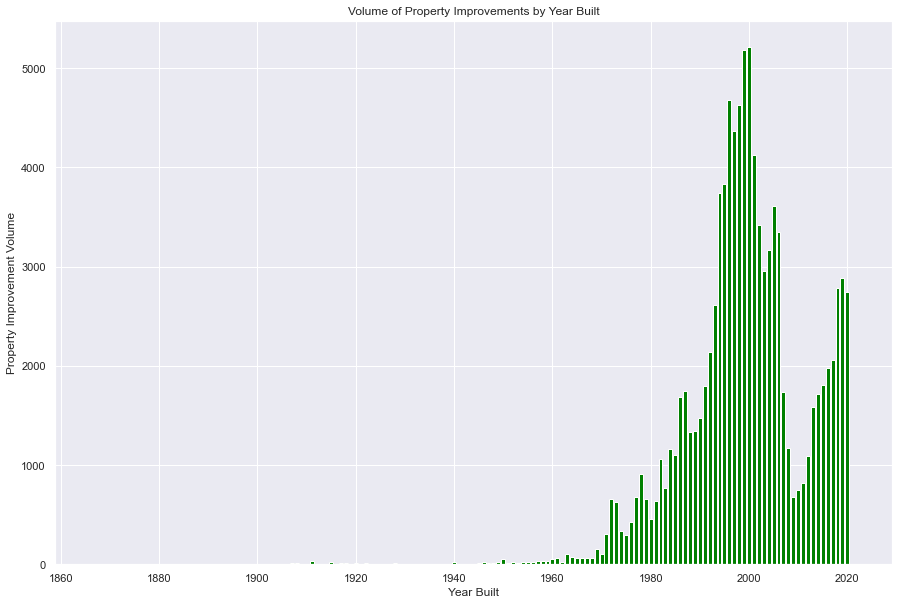

In [15]:
# Visualize number of records per Built Year
# Create Summary for Built Year
builtyr = df_PR['Built_Year'].value_counts().to_frame('count').reset_index()

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Property Improvements by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Property Improvement Volume')
           
# View the Year Built for properties in douglas county
plt.bar(builtyr['index'], builtyr['count'], color='green')

In [16]:
# Identify Rows
is_2000 = df_PR['Built_Year']>=2000

# Filter the dataframe to Build Year >= 2000
df_PR_2000 = df_PR[is_2000]
print(df_PR_2000.shape)

(49638, 25)


<BarContainer object of 22 artists>

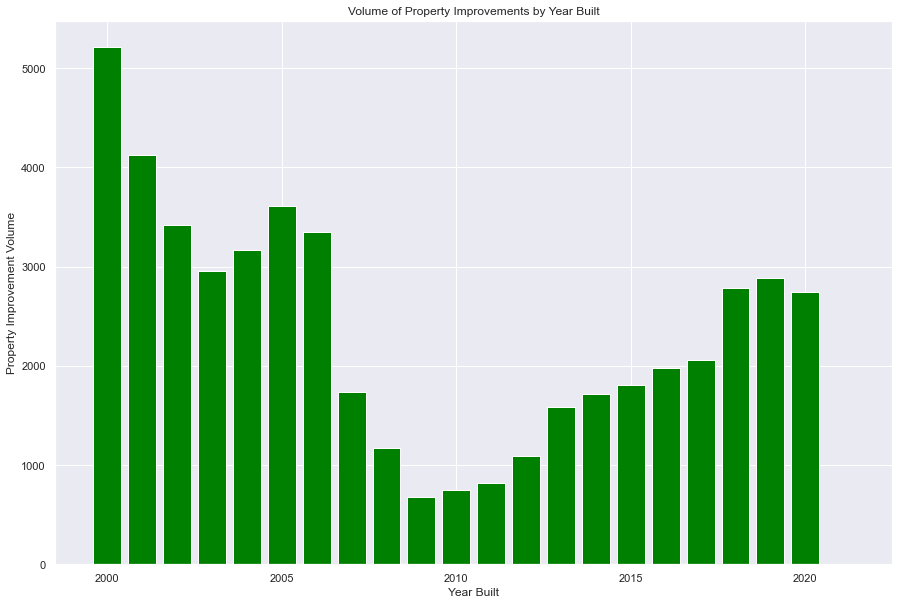

In [17]:
# Visualize number of records per Built Year
# Create Summary for Built Year
builtyr2 = df_PR_2000['Built_Year'].value_counts().to_frame('count').reset_index()

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Property Improvements by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Property Improvement Volume')
           
# View the Year Built for properties in douglas county
plt.bar(builtyr2['index'], builtyr2['count'], color='green')

In [18]:
# Filter to features that I am interested in
# create copy of dataframe to work with
df_PR_copy = df_PR_2000.copy()

#List of features I am interested in
features = ['Total_Garage_SF','Total_Finished_Basement_SF','Built_as_SF','No_of_Bedrooms','No_of_Bathrooms'
            ,'Total_Net_Acres','Quality_ord','Condition_ord','Actual_Value']
    
# Filter dataframe to list of features
df_PR_Bemiss = df_PR_copy[['Total_Garage_SF','Total_Finished_Basement_SF','Built_as_SF','No_of_Bedrooms'
                           ,'No_of_Bathrooms','Total_Net_Acres','Quality_ord','Condition_ord','Actual_Value']]

df_PR_Bemiss.shape

(49638, 9)

In [19]:
# view the first few records of the new dataframe
df_PR_Bemiss.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
14              0.0                         0.0       1848.0             2.0   
29           1007.0                      1152.0       2649.0             3.0   
34            600.0                         0.0       2414.0             3.0   
35            786.0                         0.0       4345.0             3.0   
36            576.0                         0.0       2153.0             3.0   

    No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  
14              2.0         1.000000          3.0            3.0      246222.0  
29              3.0         1.880005          3.0            3.0      528012.0  
34              2.0         2.280005          3.0            3.0      394601.0  
35              3.0         2.389991          4.0            3.0      646822.0  
36              3.0         2.400000          4.0            3.0      411464.0

In [20]:
df_PR_Bemiss.reset_index(inplace=True)
df_PR_Bemiss.rename(columns = {"index":"orig_index"}, inplace = True)
df_PR_Bemiss.head()

C:\Users\edkcb\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


orig_index  Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
0          14              0.0                         0.0       1848.0   
1          29           1007.0                      1152.0       2649.0   
2          34            600.0                         0.0       2414.0   
3          35            786.0                         0.0       4345.0   
4          36            576.0                         0.0       2153.0   

   No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
0             2.0              2.0         1.000000          3.0   
1             3.0              3.0         1.880005          3.0   
2             3.0              2.0         2.280005          3.0   
3             3.0              3.0         2.389991          4.0   
4             3.0              3.0         2.400000          4.0   

   Condition_ord  Actual_Value  
0            3.0      246222.0  
1            3.0      528012.0  
2            3.0      394601.0  
3            3.0      646822.0  
4            3.0      411464.0

### Visualize the Data

#### View a Coorelation Matrix and Plot

In [21]:
# Create a coorelation matrix of the data - Imputed Primary features (scaled)
corrMatrix = df_PR_Bemiss.corr()

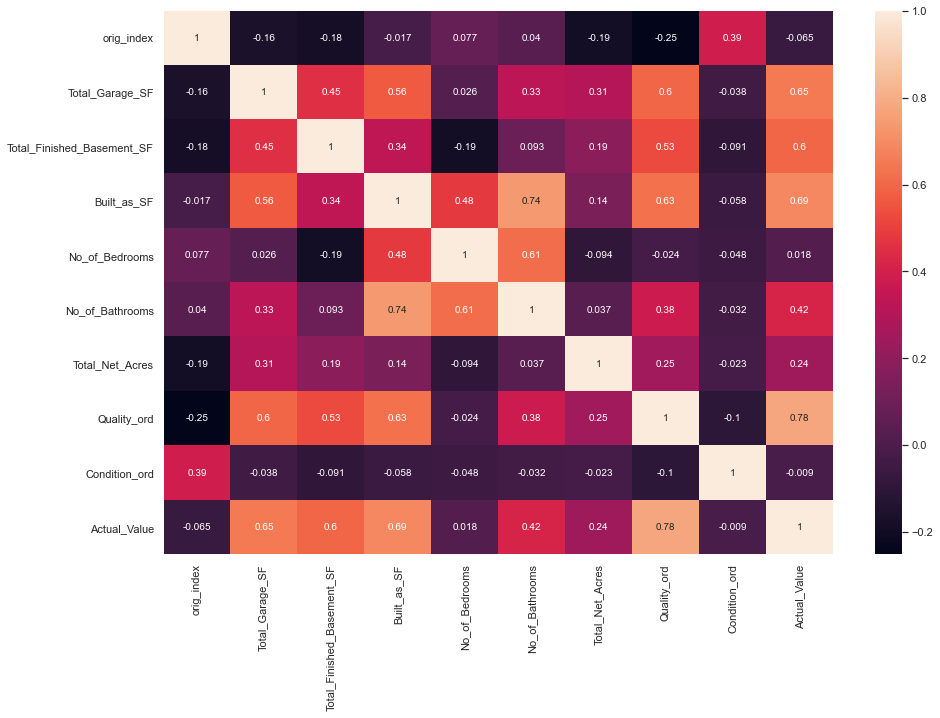

In [22]:
# Set Figure labels and size and plot the coorelation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### View a Pair Plot of each of the Variables

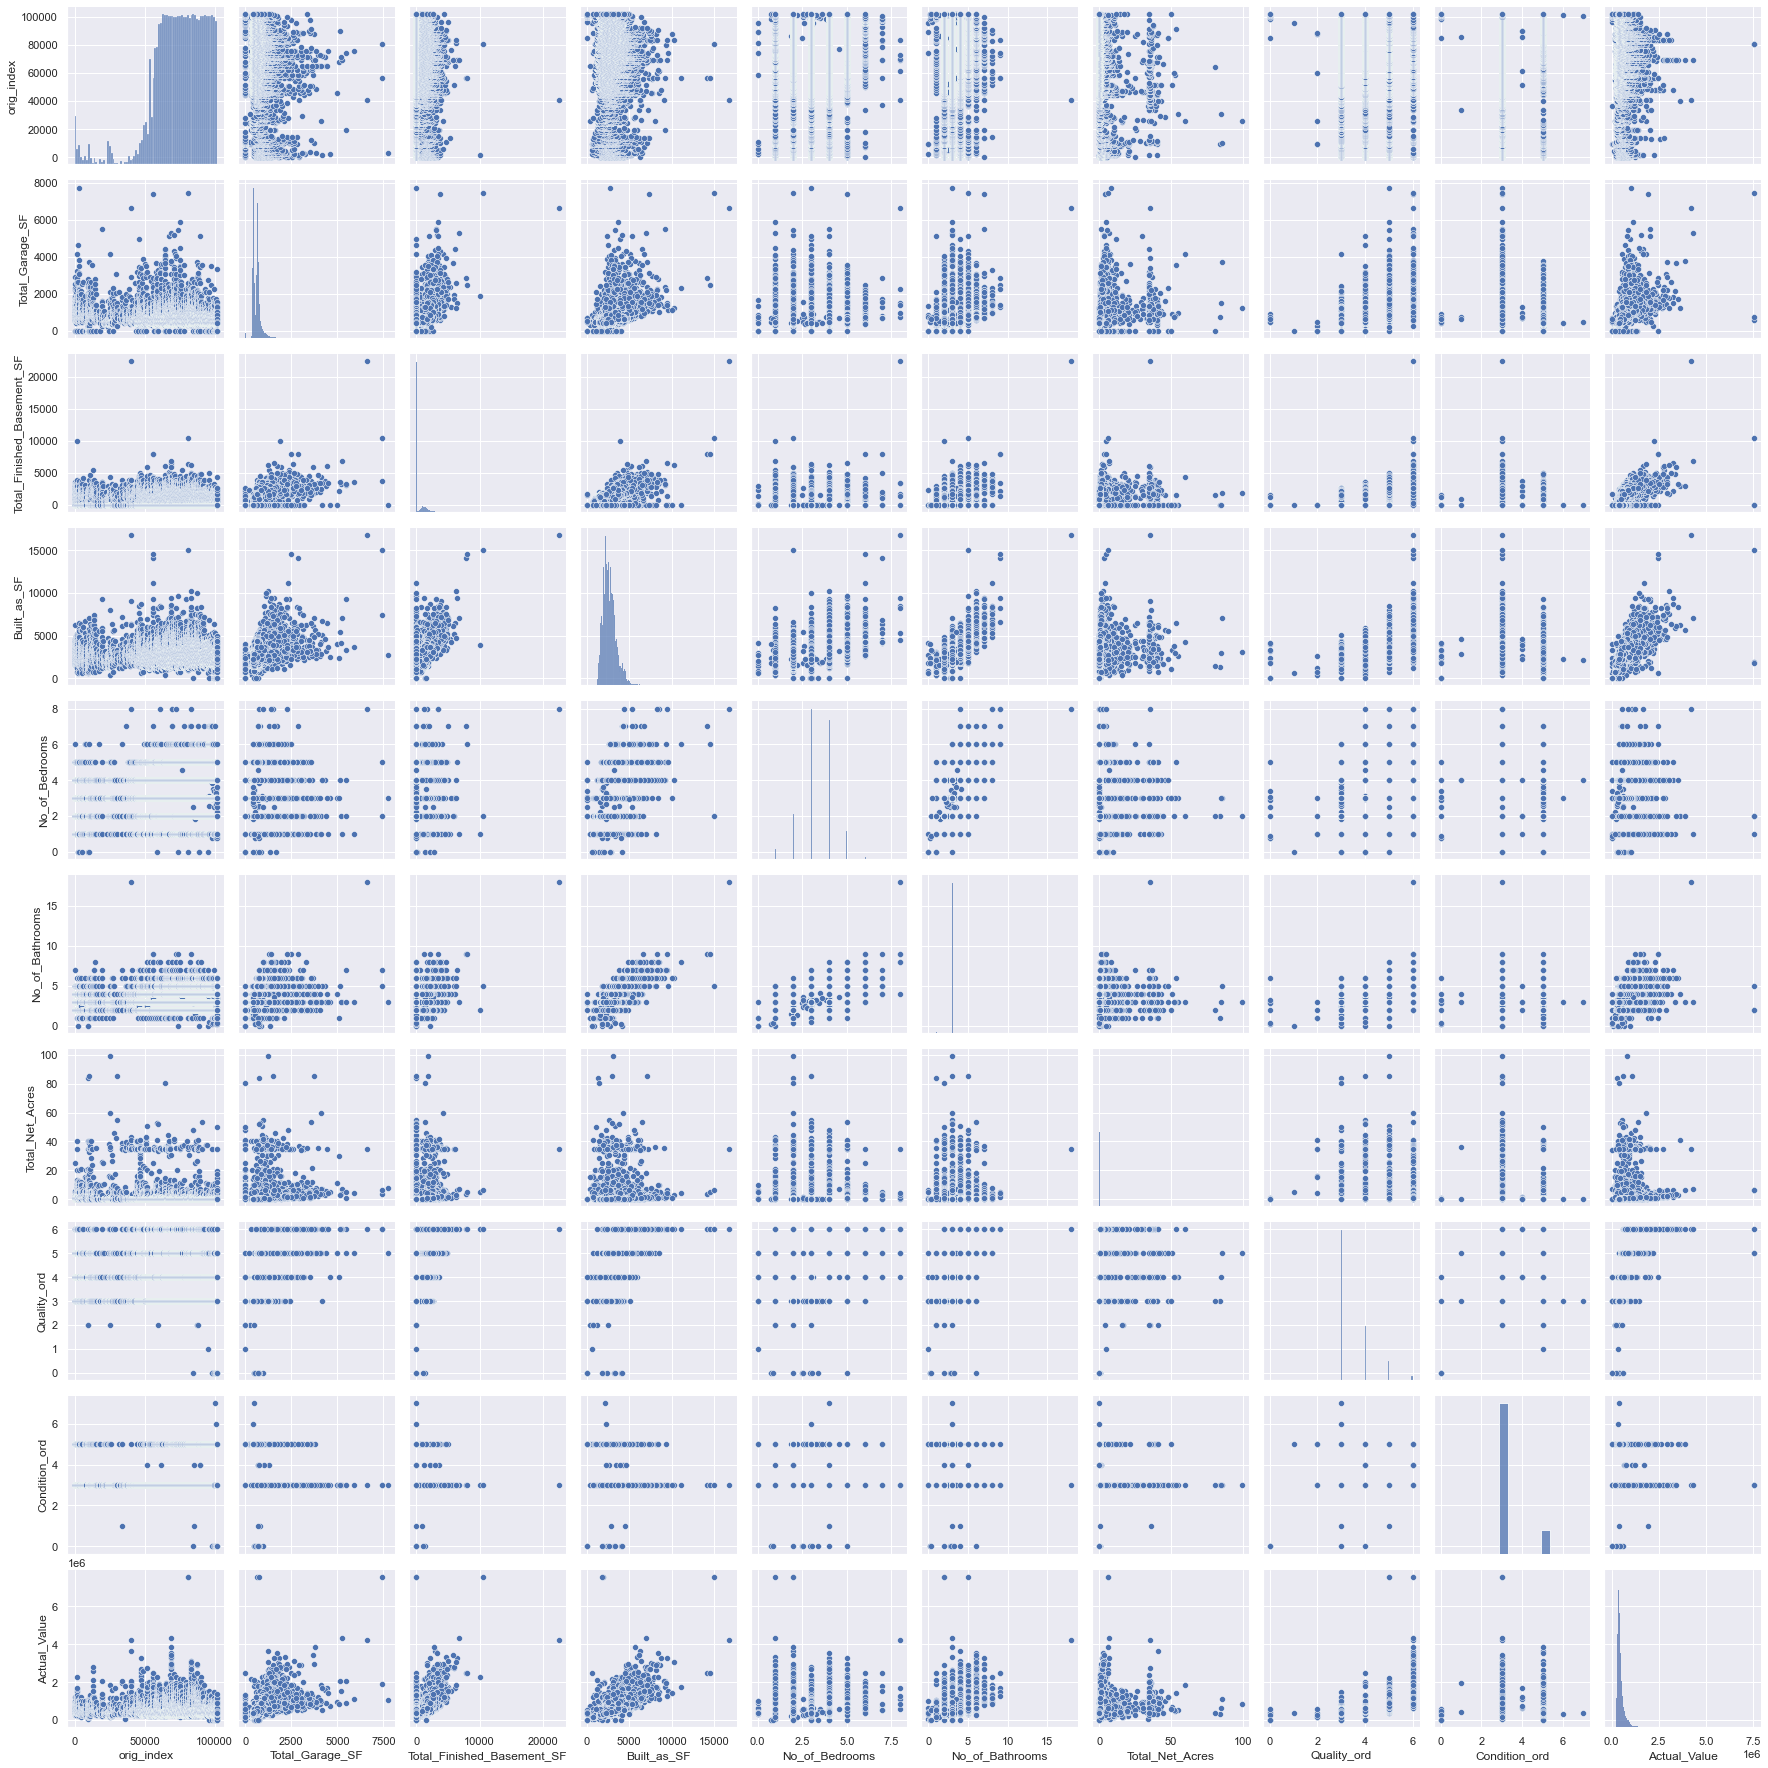

In [23]:
# Plot Pairs Plot
sns.pairplot(df_PR_Bemiss)

### Standardize the Data

In [24]:
# Copy the data
df_PR_Bemiss_stan = df_PR_Bemiss.copy()
df_PR_Bemiss_stan.drop('orig_index', axis=1, inplace=True)
##### Scale the data 
scaler = StandardScaler()
df_PR_Bemiss_stan[features]=scaler.fit_transform(df_PR_Bemiss_stan[features])
df_PR_Bemiss_stan.head(5)

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
0        -2.390045                   -0.717463    -0.980155       -1.505296   
1         1.334913                    0.745639     0.002055       -0.402418   
2        -0.170606                   -0.717463    -0.286109       -0.402418   
3         0.517420                   -0.717463     2.081743       -0.402418   
4        -0.259384                   -0.717463    -0.606155       -0.402418   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  
0        -1.429374         0.168048    -0.633965      -0.397782     -1.045625  
1        -0.204429         0.503015    -0.633965      -0.397782      0.233313  
2        -1.429374         0.655272    -0.633965      -0.397782     -0.372189  
3        -0.204429         0.697137     0.755568      -0.397782      0.772547  
4        -0.204429         0.700947     0.755568      -0.397782     -0.295654

In [25]:
# Create a coorelation matrix of the data - Imputed Primary features (scaled)
corrMatrix2 = df_PR_Bemiss_stan.corr()

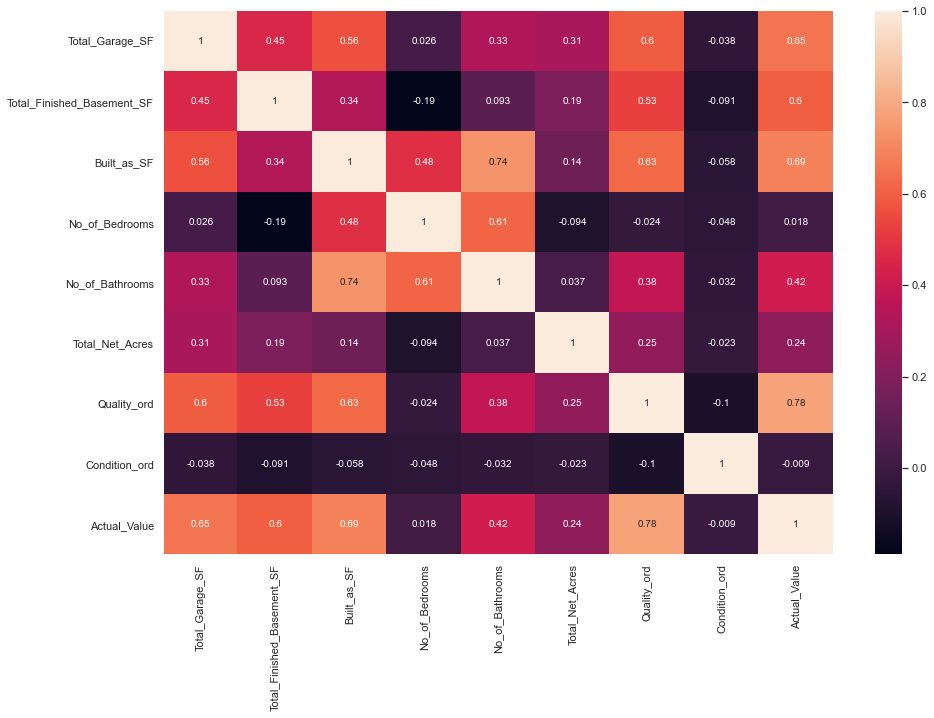

In [26]:
# Set Figure labels and size and plot the coorelation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix2, annot=True)
plt.show()

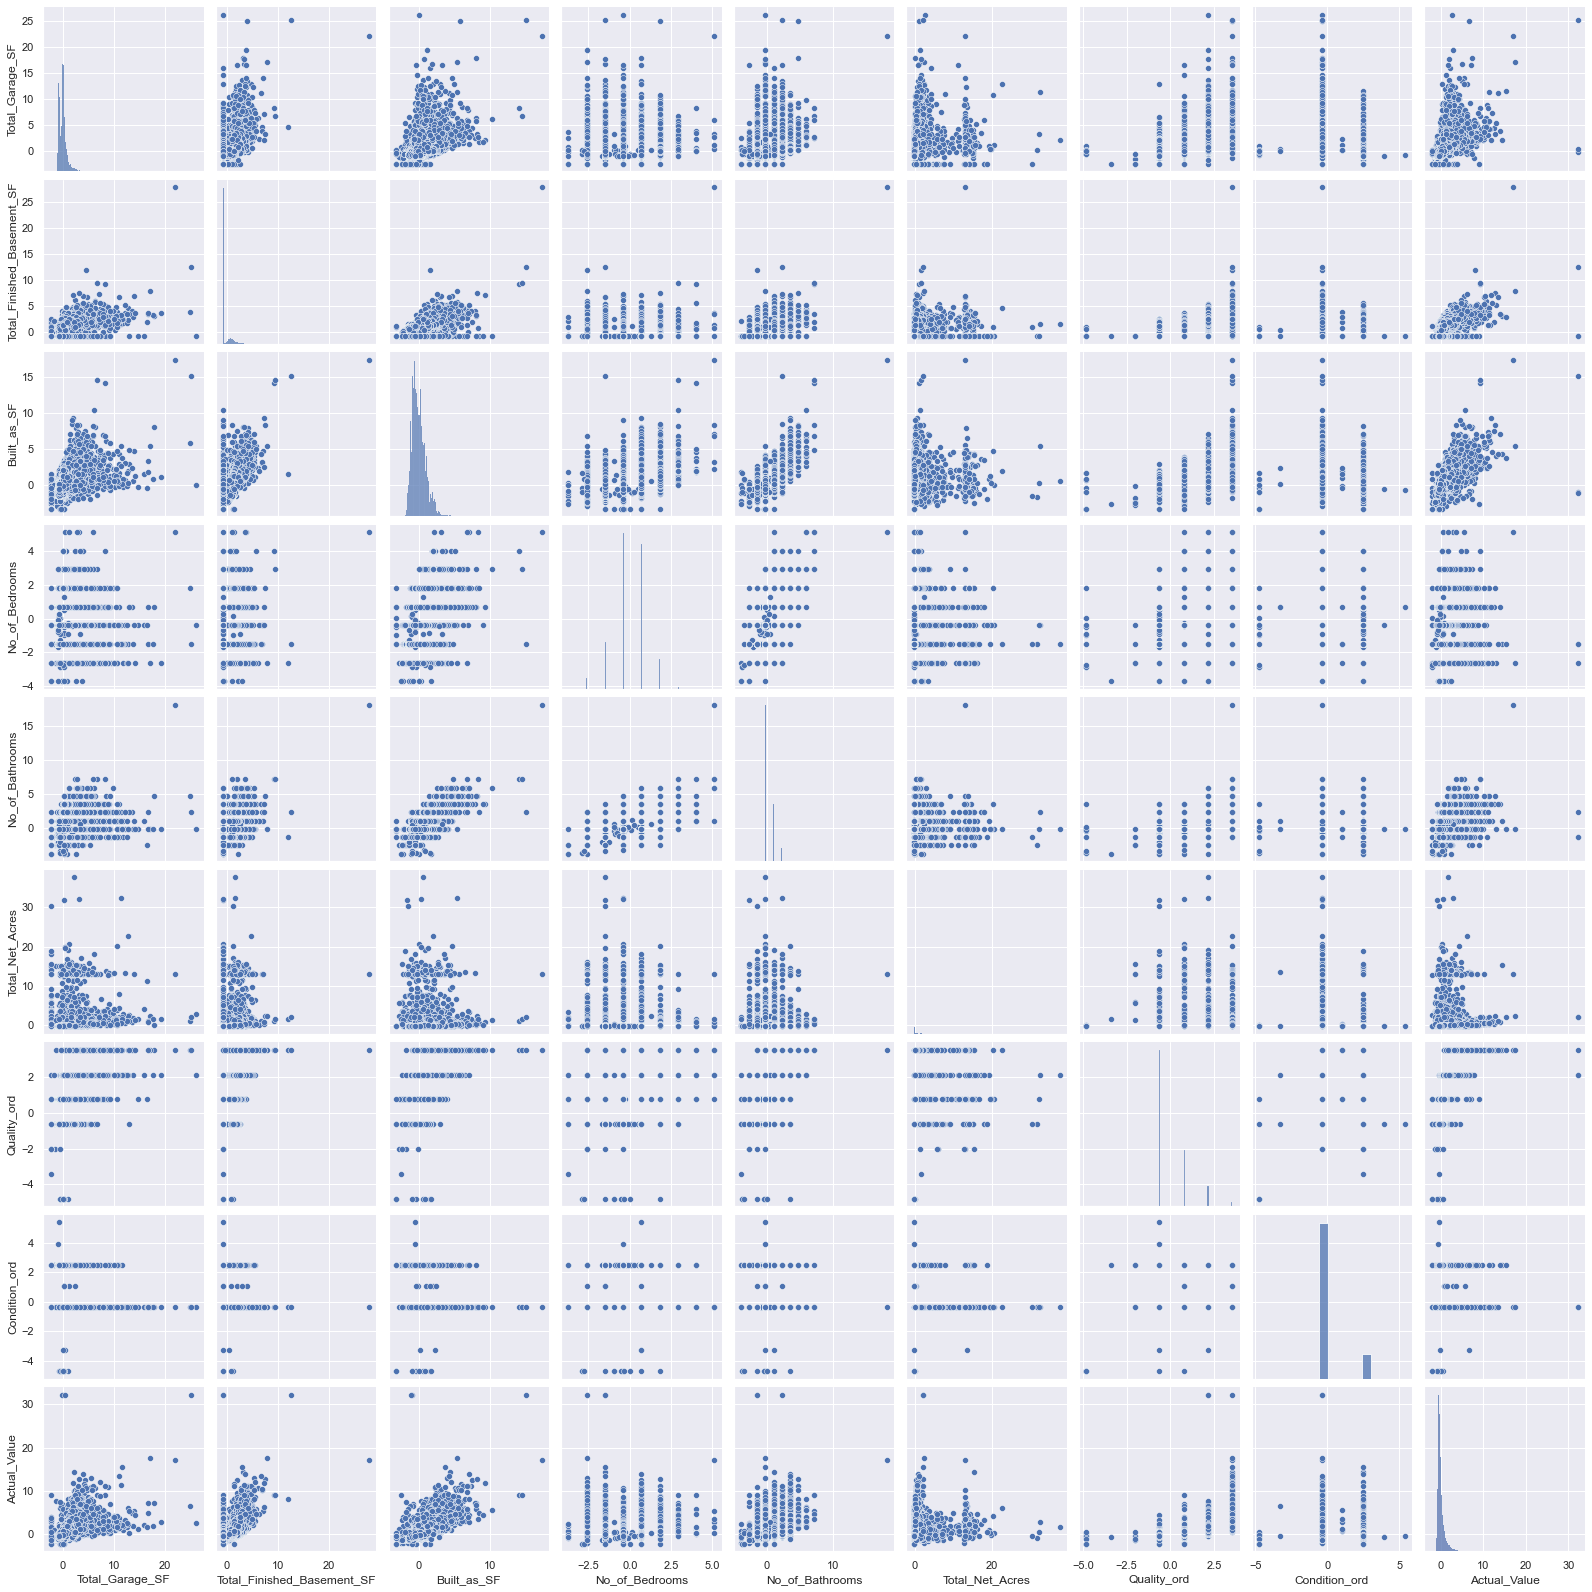

In [27]:
# Plot Pairs Plot
sns.pairplot(df_PR_Bemiss_stan)

### PCA

In [28]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(1, df_PR_Bemiss_stan.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_PR_Bemiss_stan)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df_PR_Bemiss_stan)
cluster_df=Final_PCA.transform(df_PR_Bemiss_stan)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 5 components, we can explain 0.8833123011457533% of the variability in the original data.


In [29]:
# See how many components reach 99%
Final_PCA = PCA(n_components= 9,random_state=42)
Final_PCA.fit(df_PR_Bemiss_stan)
cluster_df=Final_PCA.transform(df_PR_Bemiss_stan)
comp_check = Final_PCA.explained_variance_ratio_
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(9,comp_check.sum()))

Using 9 components, we can explain 1.0% of the variability in the original data.


In [30]:
# Create Dataframe of Principle Components of PCA
PCA_PR = pd.DataFrame(data = cluster_df)
PCA_PR.shape

(49638, 9)

In [31]:
# View the first few rows of dataframe
PCA_PR.head()

0         1         2         3         4         5         6  \
0 -2.973523  1.076176 -0.552057  0.187233 -0.350274 -1.507954 -0.007151   
1  0.580985  0.892870 -0.293770  0.371584  0.047608  1.325014  0.397417   
2 -1.257211  0.736522 -0.353028  0.850286  0.410968  0.143392 -0.633344   
3  1.600009  0.045381 -0.160905  0.597870  1.065155 -0.640143 -0.453129   
4 -0.388834  0.482359 -0.362387  0.760702  0.561982 -0.816539 -0.119712   

          7         8  
0  0.338707 -0.572107  
1  0.366472  0.000734  
2  0.516571 -0.361568  
3  0.853806 -1.306799  
4 -0.565452  0.224856

In [32]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA.explained_variance_ratio_))

Explained variation per principal component: [0.42146283 0.19845991 0.11176172 0.09825815 0.05336969 0.04692852
 0.0296126  0.02276948 0.01737709]


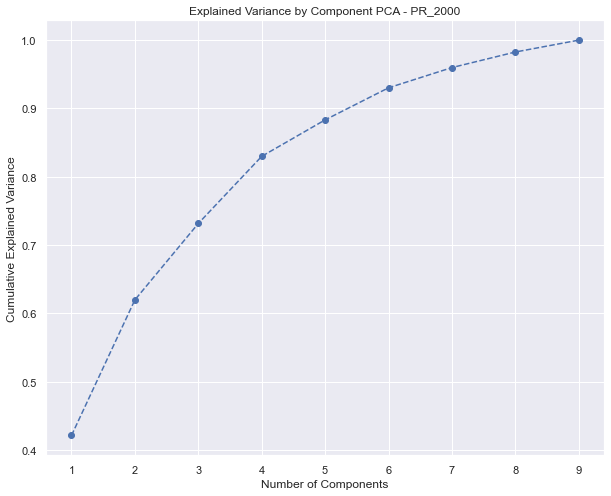

In [33]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component PCA - PR_2000')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,10), Final_PCA.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

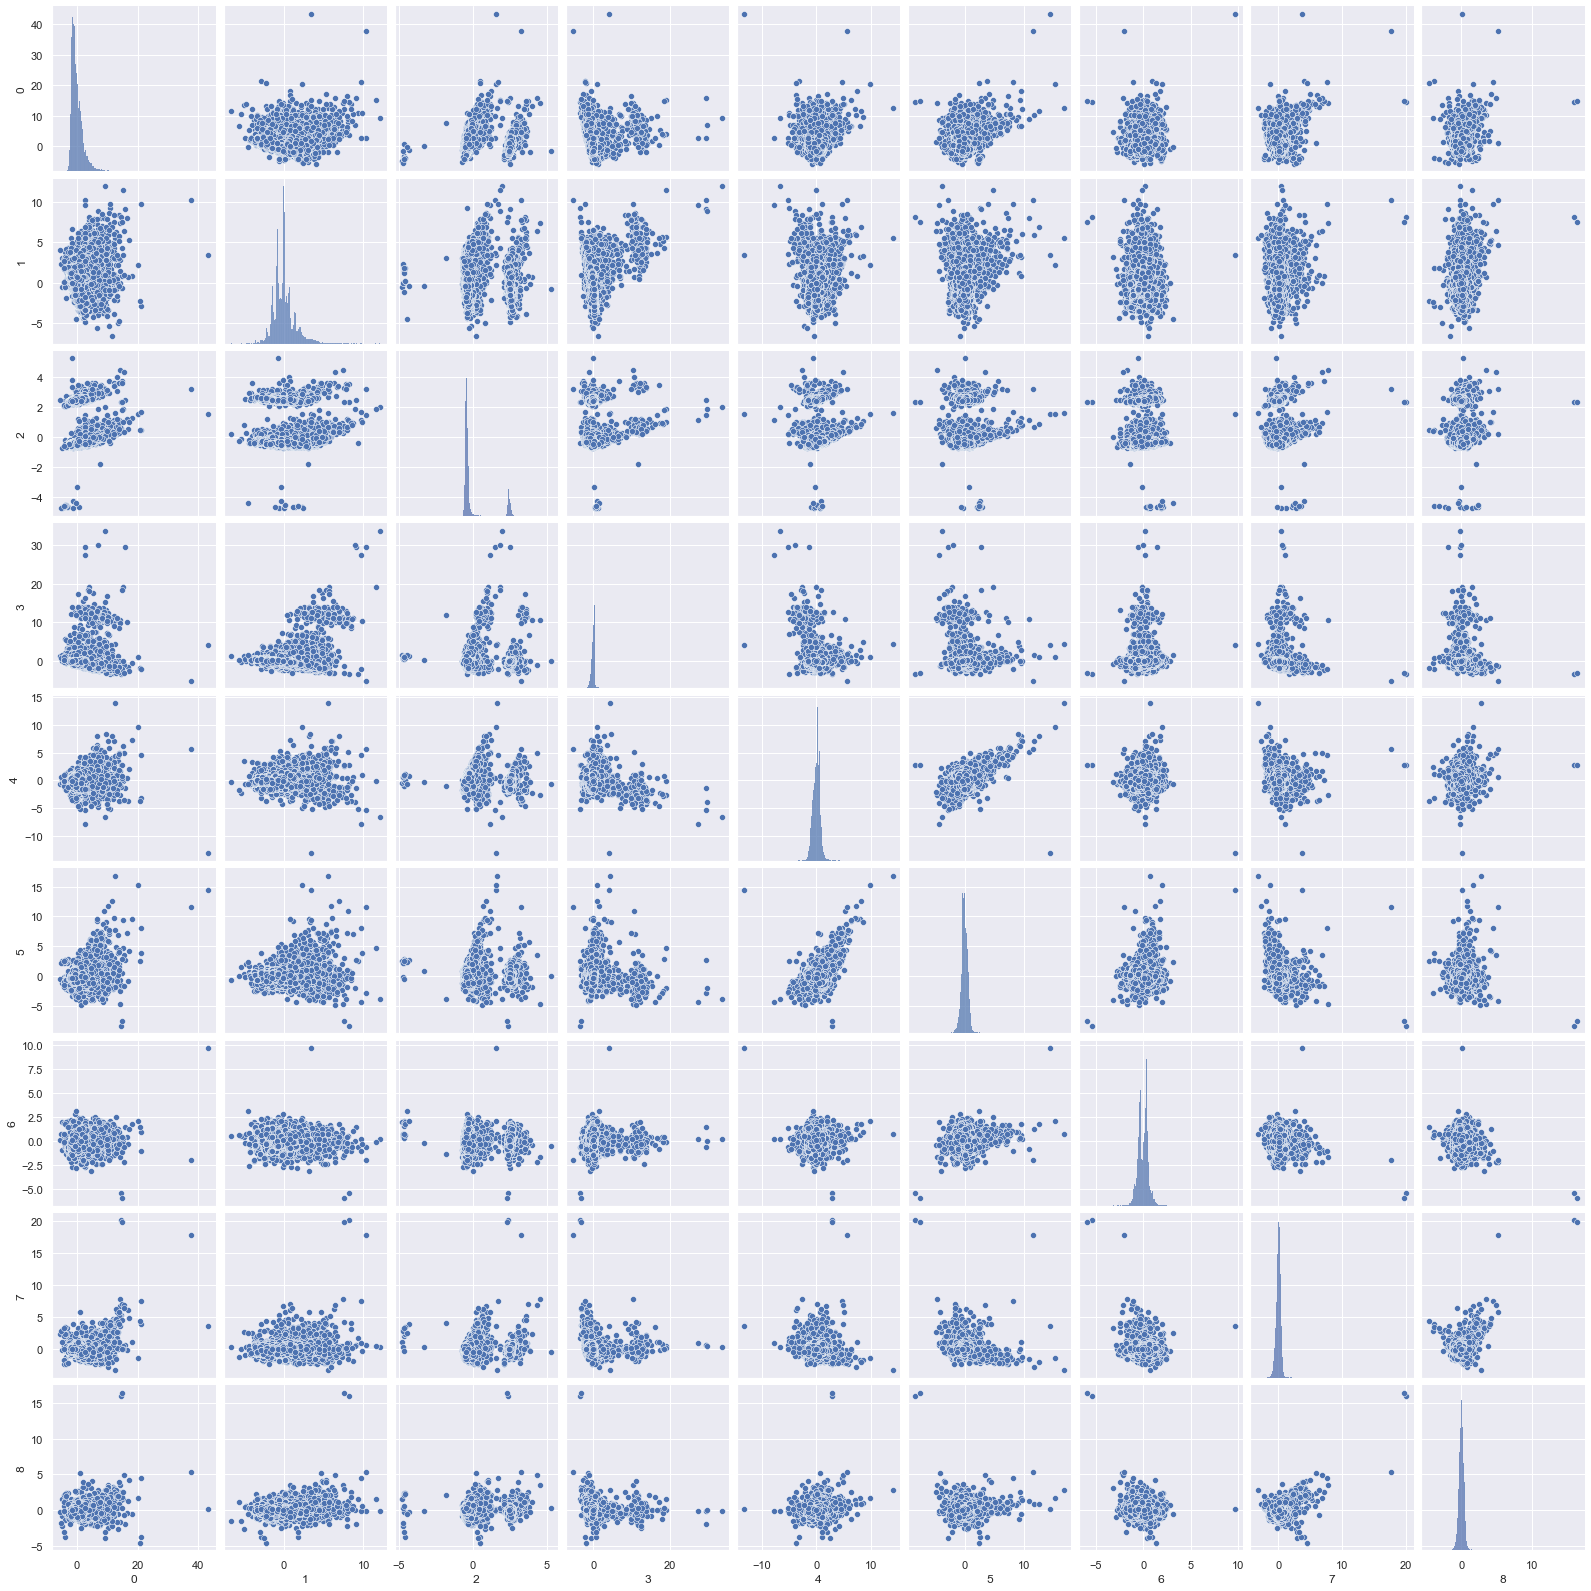

In [34]:
# Plot the PCA Components
sns.pairplot(PCA_PR)

#### Heat-Map of Components to Variables

In [35]:
# View the first 3 PCA Components and the first 10 variables
Final_PCA.components_[0:11,0:11]

array([[ 3.97372787e-01,  3.12244519e-01,  4.44957332e-01,
         1.26499926e-01,  3.30791464e-01,  1.65016096e-01,
         4.30783937e-01, -4.90960502e-02,  4.53839666e-01],
       [ 1.52732190e-01,  3.66375350e-01, -2.66701690e-01,
        -6.52479664e-01, -4.78424840e-01,  2.54111139e-01,
         1.70455531e-01, -1.97970615e-03,  1.51857408e-01],
       [ 6.24304957e-02, -8.41133990e-02,  2.48521360e-02,
        -3.68830134e-02,  3.37819672e-02,  6.03779823e-02,
        -3.32435737e-02,  9.87224897e-01,  8.08982648e-02],
       [ 8.19123398e-02, -2.79483855e-01, -2.20542669e-02,
         1.36102611e-01,  3.79849186e-02,  9.22852588e-01,
        -1.19698296e-01, -7.25687322e-02, -1.53216109e-01],
       [ 5.03740753e-01, -7.54604836e-01,  2.27462801e-02,
        -2.77582551e-01, -6.78913154e-02, -2.00983001e-01,
         2.09983019e-01, -8.92391559e-02,  4.67700452e-02],
       [ 7.23830256e-01,  2.80082523e-01, -6.52652750e-02,
         2.50628598e-01, -1.60199549e-01, -1.094507

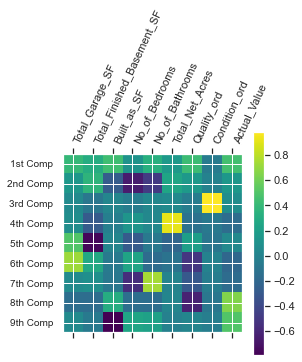

In [36]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA.components_[0:11,0:11],cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp','7th Comp'
                     ,'8th Comp','9th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features[0:11])),features[0:11],rotation=65,ha='left')

plt.show()# 

### Unsupervised Cluster Analysis: K-Means

##### Determine the "n" - # of clusters: Elbow Metho

In [37]:
# find the appropriate cluster number
sse = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_PR)
    sse.append(kmeans.inertia_)

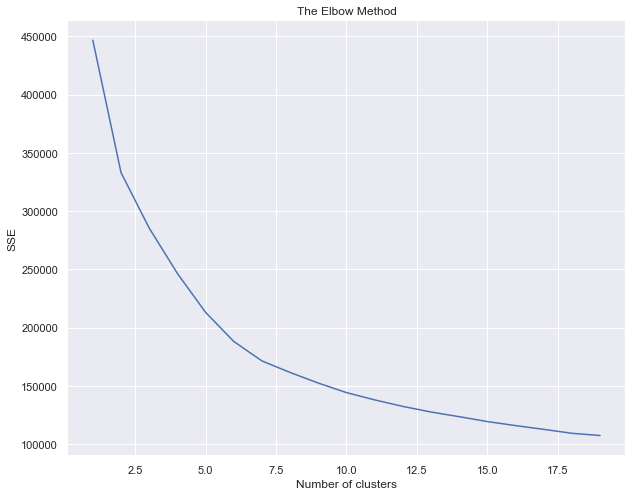

In [38]:
# Plot the sse to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 20), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

##### Determine the "n" - # of clusters: KneeLocator (Kneed Library)

In [39]:
# Use another method with package Kneed
kl_2 = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

kl_2.elbow

6

#### K-Means Clustering using PCA Components

In [40]:
# Set KMeans algorithm variables
kmeans = KMeans(
    init="k-means++",
    n_clusters=6,
    random_state=42
)
# fit the data to the model
kmeans.fit_predict(PCA_PR)

array([2, 2, 2, ..., 4, 4, 5])

In [41]:
# The lowest SSE value
kmeans.inertia_

188098.61339056565

In [42]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.17130171e+00, -1.18183170e+00, -2.40631674e-01,
         4.30884725e-02,  2.39500785e-02, -6.04834894e-02,
        -2.23037114e-03, -9.38316957e-02, -9.89389165e-02],
       [ 1.29089865e+00,  2.31123834e+00, -2.38514853e-01,
        -5.55547492e-01, -3.50409325e-02, -1.50248308e-01,
        -2.09098543e-02, -2.45455406e-01, -9.77742146e-02],
       [-1.12600984e+00,  8.07573333e-02, -4.44114245e-01,
         7.16352655e-02,  2.42658450e-02,  6.50997079e-02,
         1.14097819e-02,  8.84114661e-02,  4.39624117e-02],
       [ 5.77590830e+00,  4.91750354e+00,  9.20528466e-01,
         1.18880728e+01, -1.97327129e+00, -1.01545119e+00,
         3.41621201e-02,  3.97405811e-01,  5.60808966e-02],
       [-9.45198179e-01,  3.39073228e-02,  2.44714934e+00,
        -1.57403840e-01, -1.09399551e-01,  1.77644356e-02,
        -2.93336195e-02, -5.19742855e-02, -3.63959178e-02],
       [ 5.40877571e+00,  2.31102639e-01,  5.28965833e-02,
        -5.35013860e-01,  1.27262361e-01, -6.988990

In [43]:
# The number of iterations required to converge
kmeans.n_iter_

27

In [44]:
# View the predicted "Labels" for the first 5 properties
kmeans.labels_[:5]

array([2, 2, 2, 0, 2])

#### Analyze Results of K-Means Clustering with PCA

In [45]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_Bemiss_stan
# Components: PCA_PR
df_kmeans_segm = pd.concat([df_PR_Bemiss_stan.reset_index(drop = True), PCA_PR], axis = 1)
# Rename the columns for the PCA Components
df_kmeans_segm.columns.values[-9:] = ['Component_1','Component_2','Component_3','Component_4','Component_5','Component_6'
                                     ,'Component_7','Component_8','Component_9']

# Add the PCA clustering labels
df_kmeans_segm['Kmeans_PCA_Cluster'] = kmeans.labels_

# Add the names of the clusters
df_kmeans_segm['Cluster'] = df_kmeans_segm['Kmeans_PCA_Cluster'].map({0:'First'
                                                                      ,1:'Second'
                                                                      ,2:'Third'
                                                                      ,3:'Fourth'
                                                                      ,4:'Fifth'
                                                                      ,5:'Sixth'})

df_kmeans_segm.shape

(49638, 20)

In [46]:
# View the first few records of the dataframe "df_kmeans_segm"
df_kmeans_segm.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
0        -2.390045                   -0.717463    -0.980155       -1.505296   
1         1.334913                    0.745639     0.002055       -0.402418   
2        -0.170606                   -0.717463    -0.286109       -0.402418   
3         0.517420                   -0.717463     2.081743       -0.402418   
4        -0.259384                   -0.717463    -0.606155       -0.402418   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  \
0        -1.429374         0.168048    -0.633965      -0.397782     -1.045625   
1        -0.204429         0.503015    -0.633965      -0.397782      0.233313   
2        -1.429374         0.655272    -0.633965      -0.397782     -0.372189   
3        -0.204429         0.697137     0.755568      -0.397782      0.772547   
4        -0.204429         0.700947     0.755568      -0.397782     -0.295654   

   Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -2.973523     1.076176    -0.552057     0.187233    -0.350274   
1     0.580985     0.892870    -0.293770     0.371584     0.047608   
2    -1.257211     0.736522    -0.353028     0.850286     0.410968   
3     1.600009     0.045381    -0.160905     0.597870     1.065155   
4    -0.388834     0.482359    -0.362387     0.760702     0.561982   

   Component_6  Component_7  Component_8  Component_9  Kmeans_PCA_Cluster  \
0    -1.507954    -0.007151     0.338707    -0.572107                   2   
1     1.325014     0.397417     0.366472     0.000734                   2   
2     0.143392    -0.633344     0.516571    -0.361568                   2   
3    -0.640143    -0.453129     0.853806    -1.306799                   0   
4    -0.816539    -0.119712    -0.565452     0.224856                   2   

  Cluster  
0   Third  
1   Third  
2   Third  
3   First  
4   Third

In [47]:
# Changing columns name with index number
df_kmeans_segm.rename(columns={df_kmeans_segm.columns[0]:'Total_Garage_SF_stan'
         , df_kmeans_segm.columns[1]:'Total_Finished_Basement_SF_stan'
          ,df_kmeans_segm.columns[2]:'Built_as_SF_stan'
          ,df_kmeans_segm.columns[3]:'No_of_Bedrooms_stan'
          ,df_kmeans_segm.columns[4]:'No_of_Bathrooms_stan'
          ,df_kmeans_segm.columns[5]:'Total_Net_Acres_stan'
          ,df_kmeans_segm.columns[6]:'Quality_ord_stan'
          ,df_kmeans_segm.columns[7]:'Condition_ord_stan'
          ,df_kmeans_segm.columns[8]:'Actual_Value_stan'},inplace = True)
df_kmeans_segm.head()

Total_Garage_SF_stan  Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
0             -2.390045                        -0.717463         -0.980155   
1              1.334913                         0.745639          0.002055   
2             -0.170606                        -0.717463         -0.286109   
3              0.517420                        -0.717463          2.081743   
4             -0.259384                        -0.717463         -0.606155   

   No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
0            -1.505296             -1.429374              0.168048   
1            -0.402418             -0.204429              0.503015   
2            -0.402418             -1.429374              0.655272   
3            -0.402418             -0.204429              0.697137   
4            -0.402418             -0.204429              0.700947   

   Quality_ord_stan  Condition_ord_stan  Actual_Value_stan  Component_1  \
0         -0.633965           -0.397782          -1.045625    -2.973523   
1         -0.633965           -0.397782           0.233313     0.580985   
2         -0.633965           -0.397782          -0.372189    -1.257211   
3          0.755568           -0.397782           0.772547     1.600009   
4          0.755568           -0.397782          -0.295654    -0.388834   

   Component_2  Component_3  Component_4  Component_5  Component_6  \
0     1.076176    -0.552057     0.187233    -0.350274    -1.507954   
1     0.892870    -0.293770     0.371584     0.047608     1.325014   
2     0.736522    -0.353028     0.850286     0.410968     0.143392   
3     0.045381    -0.160905     0.597870     1.065155    -0.640143   
4     0.482359    -0.362387     0.760702     0.561982    -0.816539   

   Component_7  Component_8  Component_9  Kmeans_PCA_Cluster Cluster  
0    -0.007151     0.338707    -0.572107                   2   Third  
1     0.397417     0.366472     0.000734                   2   Third  
2    -0.633344     0.516571    -0.361568                   2   Third  
3    -0.453129     0.853806    -1.306799                   0   First  
4    -0.119712    -0.565452     0.224856                   2   Third

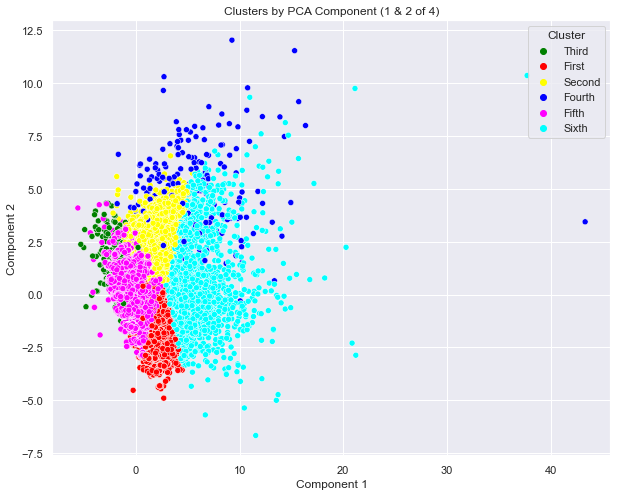

In [48]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_kmeans_segm['Component_1']
y_axis = df_kmeans_segm['Component_2']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

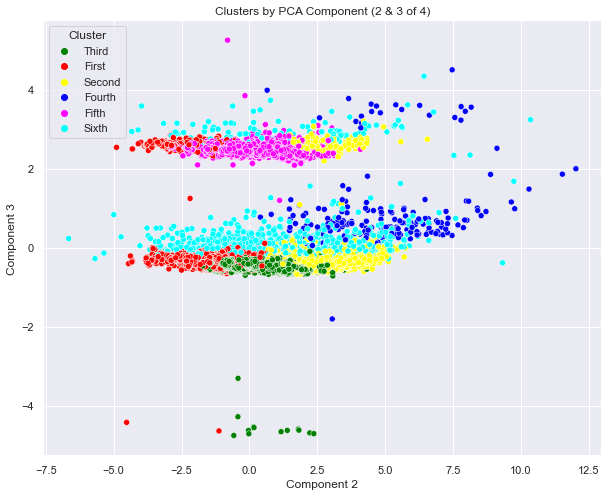

In [49]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (2 & 3 of 4)')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

# Set the Axis
x_axis = df_kmeans_segm['Component_2']
y_axis = df_kmeans_segm['Component_3']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth':'cyan'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

#### Performance Evaluation

##### The Silhouette Coefficient
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters.

    - Close to -1:incorrect clustering
    - Close to 0: overlapping clusters.
    - Close to 1:highly dense clustering

In [50]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels = kmeans.labels_
silhouette1 = metrics.silhouette_score(PCA_PR, labels, metric='euclidean')
silhouette1

0.32637107937285126

##### Calinski-Harabasz Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.

In [51]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski1 = metrics.calinski_harabasz_score(PCA_PR, labels)
Calinski1

13649.217325188041

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [52]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies1 = davies_bouldin_score(PCA_PR, labels)
Davies1

1.0708654377339504

In [53]:
# Create a dataframe with the 3 performance evaluation methods
Metric = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval = [silhouette1,Calinski1,Davies1]
Performance_Evaluation1 = pd.DataFrame(Eval,index=Metric,columns=['K-Means_PCA'])
Performance_Evaluation1

K-Means_PCA
Silhouette             0.326371
Calinski-Harabasz  13649.217325
Davies-Bouldin         1.070865

### Hierarchical Clustering

##### Using the dendrogram to find the optimal numbers of clusters.

In [54]:
# Hierarchical clustering for the same dataset - PCA_Df
# creating a dataset for hierarchical clustering
PCA_PR_hier = PCA_PR
PCA_array = PCA_PR_hier.to_numpy()
len(PCA_array)

49638

In [55]:
# View the array
PCA_array

array([[-2.97352289e+00,  1.07617605e+00, -5.52057109e-01, ...,
        -7.15072494e-03,  3.38707475e-01, -5.72107458e-01],
       [ 5.80984698e-01,  8.92869749e-01, -2.93770444e-01, ...,
         3.97417087e-01,  3.66472006e-01,  7.34161485e-04],
       [-1.25721127e+00,  7.36522202e-01, -3.53027933e-01, ...,
        -6.33343803e-01,  5.16571099e-01, -3.61567860e-01],
       ...,
       [-4.62393496e-01, -1.53651058e+00,  2.48970287e+00, ...,
         3.62696511e-01,  7.78669128e-02,  9.20835280e-02],
       [-1.47458526e+00, -9.69557281e-02,  2.44567684e+00, ...,
         1.38572856e-01,  1.03581316e-01, -1.57787354e-02],
       [ 7.60242577e+00,  6.78568314e+00,  3.43191766e+00, ...,
        -9.14267394e-02,  6.66729228e-02,  1.03412260e+00]])

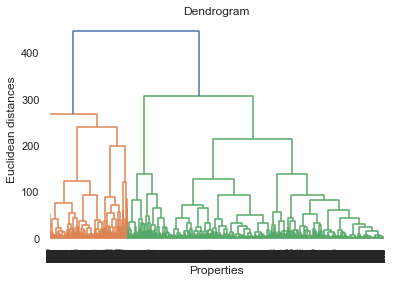

In [56]:
# return the hierarchical clustering using Ward Method encoded as a linkage matrix (ndarray)
# Plot the dendogram  - a method that tries to minimize the variance within each cluster.
dendrogram = sch.dendrogram(sch.linkage(PCA_array, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Properties')
plt.ylabel('Euclidean distances')
plt.show()

##### Fitting the Algorithim

In [57]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [58]:
# Apply model to our data set
y_hc=hc.fit_predict(PCA_PR_hier)

In [59]:
#view the predictions
y_hc

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

In [60]:
# View the length of the array
len(y_hc)

49638

#### Analyze Results of Hierarchical Clustering with PCA

In [61]:
# Create dataframe from array
PR_hier = pd.DataFrame(y_hc, columns = ['HierC_PCA_Cluster'])
PR_hier.shape

(49638, 1)

In [62]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_Bemiss_stan
# Predictions: y_hc

df_hierc_segm = pd.concat([df_kmeans_segm, PR_hier], axis = 1)

# Add the names of the clusters
df_hierc_segm['Cluster_hc'] = df_hierc_segm['HierC_PCA_Cluster'].map({0:'First'
                                                                      ,1:'Second'})

df_hierc_segm.shape

(49638, 22)

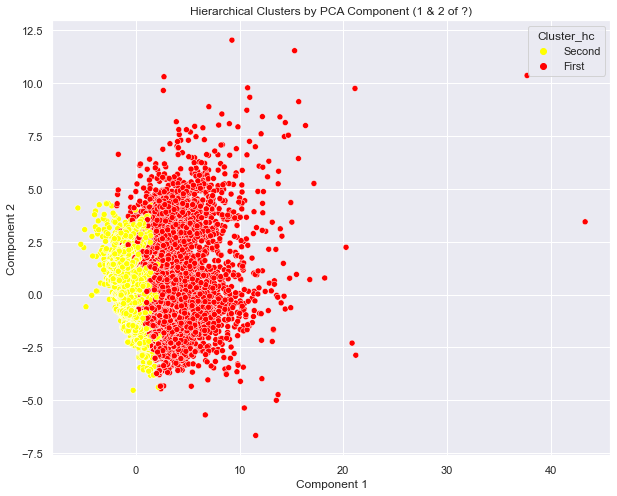

In [63]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Hierarchical Clusters by PCA Component (1 & 2 of ?)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_hierc_segm['Component_1']
y_axis = df_hierc_segm['Component_2']

# Set a color dictionary
color_dict2= dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_hierc_segm['Cluster_hc'], palette = color_dict2)

plt.show()

In [64]:
H_cluster = linkage(PCA_PR_hier,'ward')
H_cluster

array([[4.44900000e+04, 4.45530000e+04, 0.00000000e+00, 2.00000000e+00],
       [3.95280000e+04, 3.95290000e+04, 0.00000000e+00, 2.00000000e+00],
       [2.78280000e+04, 3.92310000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.92470000e+04, 9.92710000e+04, 2.68027232e+02, 1.16270000e+04],
       [9.92670000e+04, 9.92700000e+04, 3.08325951e+02, 3.80110000e+04],
       [9.92720000e+04, 9.92730000e+04, 4.47133537e+02, 4.96380000e+04]])

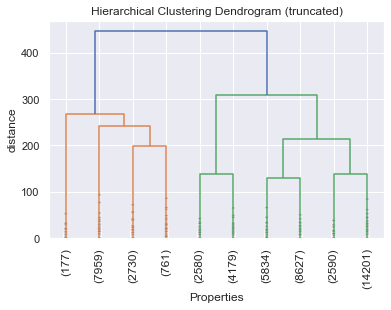

In [65]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Properties')
plt.ylabel('distance')
sch.dendrogram(
    H_cluster, 
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### Performance Evaluation

##### The Silhouette Coefficient
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters.

    - Close to -1:incorrect clustering
    - Close to 0: overlapping clusters.
    - Close to 1:highly dense clustering

In [66]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels2 = y_hc
silhouette2 = metrics.silhouette_score(PCA_PR_hier, labels2, metric='euclidean')
silhouette2

0.3227813431630656

##### Calinski-Harabasz Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.

In [67]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski2 = metrics.calinski_harabasz_score(PCA_PR_hier, labels2)
Calinski2

12232.43053203459

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [68]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies2 = davies_bouldin_score(PCA_PR_hier, labels2)
Davies2

1.3158064334192685

In [69]:
# Create a dataframe with the 3 performance evaluation methods
Metric2 = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval2 = [silhouette2,Calinski2,Davies2]
Performance_Evaluation2 = pd.DataFrame(Eval2,index=Metric2,columns=['HAC_Ward_PCA'])
Performance_Evaluation2

HAC_Ward_PCA
Silhouette             0.322781
Calinski-Harabasz  12232.430532
Davies-Bouldin         1.315806

### DBSCAN Clustering

#### Run 1: eps = 0.5 and min_samples = 20

In [70]:
# Choose min_samples = 20  (9 dimensions x 2 + 2)
dbscan = DBSCAN(algorithm = 'auto', eps=0.5, metric = 'euclidean' , min_samples = 20, n_jobs = None, p = None)
clusters = dbscan.fit_predict(PCA_PR)

In [71]:
# View the cluster assignments
clusters

array([-1, -1, -1, ..., 22, 18, -1], dtype=int64)

In [72]:
# Create dataframe from array
PR_bemiss_dbscan = pd.DataFrame(clusters, columns = ['DBSCAN_PCA_Cluster'])
PR_bemiss_dbscan.shape

(49638, 1)

In [73]:
# View the value counts of each cluster
PR_bemiss_dbscan['DBSCAN_PCA_Cluster'].value_counts()

 11    10397
-1      7862
 0      7093
 5      3100
 6      2637
 24     2334
 12     1643
 1      1585
 18     1571
 2      1170
 21      812
 23      778
 25      731
 17      450
 31      428
 9       389
 22      375
 8       374
 64      310
 14      305
 13      293
 37      218
 38      205
 45      198
 3       190
 27      190
 34      176
 7       175
 19      171
 30      169
 26      155
 33      142
 56      138
 28      128
 10      124
 41      120
 4       120
 43      118
 32      116
 15      111
 20      104
 63      102
 53       91
 59       83
 70       80
 40       80
 68       74
 65       71
 35       69
 61       64
 66       63
 57       61
 72       60
 73       59
 46       55
 48       55
 52       53
 69       52
 76       51
 39       50
 60       47
 36       45
 29       42
 50       36
 58       34
 55       33
 71       33
 79       33
 67       32
 77       31
 54       31
 16       30
 80       25
 51       24
 42       23
 74       22
 62       22

Text(0, 0.5, 'Component 2')

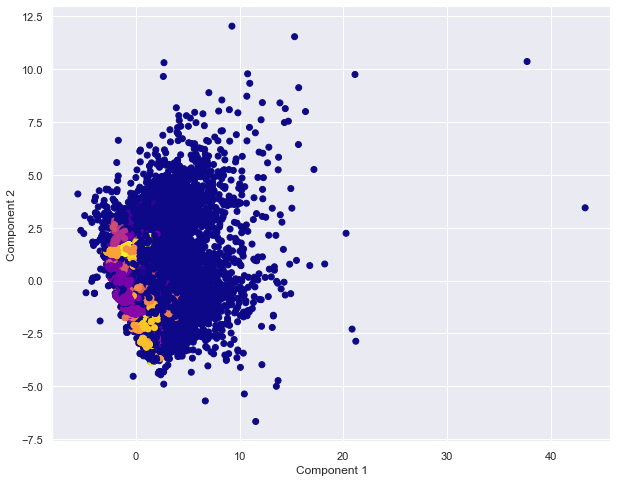

In [74]:
# plot the cluster assignments
# Set the figure size and Labels
plt.figure(figsize=(10, 8))

plt.scatter(PCA_PR[0], PCA_PR[1], c=clusters, cmap="plasma")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [75]:
# Find the nearest neighbors for the K-nearest graph (tuning)
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(PCA_PR)
distances, indices = nbrs.kneighbors(PCA_PR)

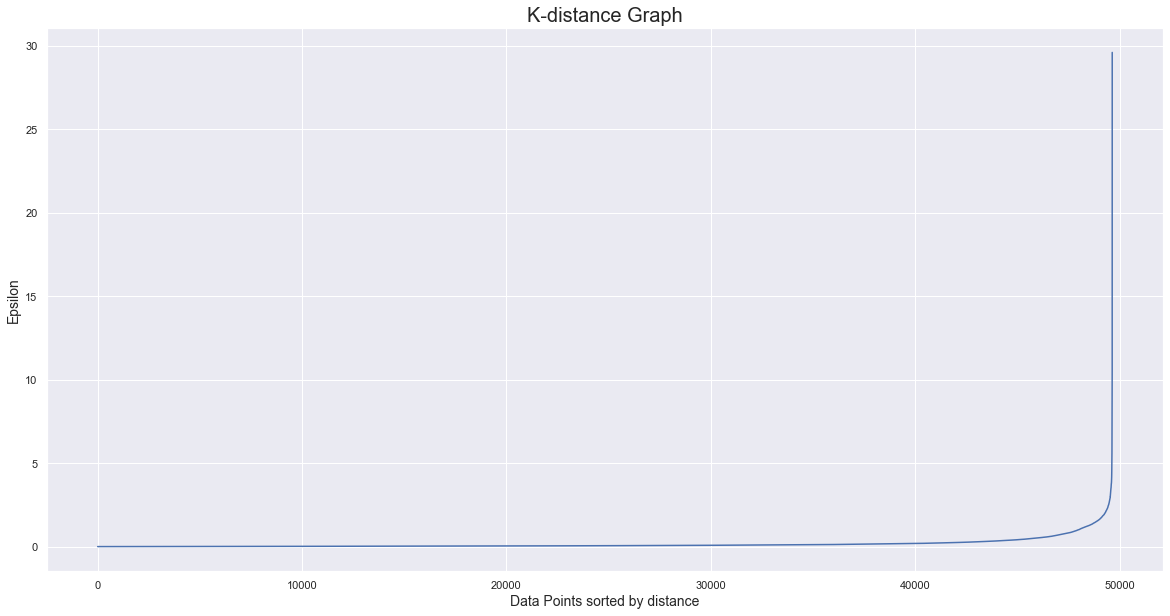

In [76]:
# Plotting K-distance Graph - epsilon should be at the point of maximum curviture
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### Run 2: eps = 2.5 and min_samples = 20

In [77]:
# Choose min_samples = 20  (9 dimensions x 2 + 2)
dbscan2 = DBSCAN(algorithm = 'auto', eps=2.5, metric = 'euclidean' , min_samples = 20, n_jobs = None, p = None)
clusters2 = dbscan2.fit_predict(PCA_PR)

In [78]:
# View the cluster assignments
clusters2

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64)

In [79]:
# Create dataframe from array
PR_bemiss_dbscan2 = pd.DataFrame(clusters2, columns = ['DBSCAN_PCA_Cluster'])
PR_bemiss_dbscan2.shape

(49638, 1)

In [80]:
# View the value counts of each cluster
PR_bemiss_dbscan2['DBSCAN_PCA_Cluster'].value_counts()

 0    49149
-1      489
Name: DBSCAN_PCA_Cluster, dtype: int64

Text(0, 0.5, 'Component 2')

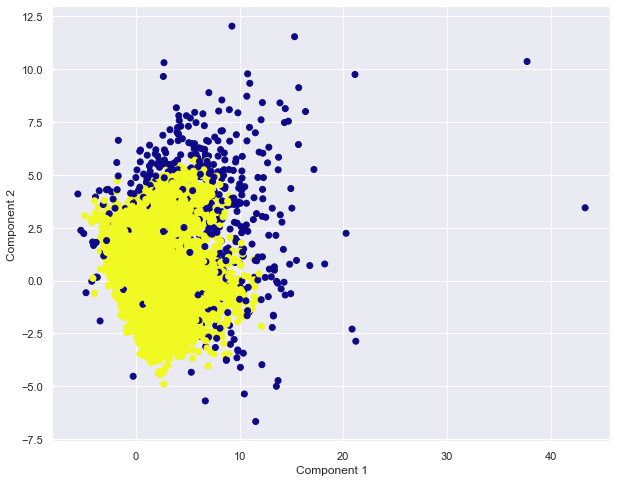

In [81]:
# plot the cluster assignments
# Set the figure size and Labels
plt.figure(figsize=(10, 8))

plt.scatter(PCA_PR[0], PCA_PR[1], c=clusters2, cmap="plasma")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

##### Analyze Results of DBSCAN Clustering with PCA

In [82]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_Bemiss_stan
# Predictions: y_hc

df_dbscan_segm = pd.concat([df_hierc_segm, PR_bemiss_dbscan], axis = 1)

# Add the names of the clusters
df_dbscan_segm['Cluster_db'] = df_dbscan_segm['DBSCAN_PCA_Cluster'].map({-1:'First'
                                                                      ,0:'Second'
                                                                      ,1:'Third'})

df_dbscan_segm.shape

(49638, 24)

#### Performance Evaluation

##### The Silhouette Coefficient
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters.

    - Close to -1:incorrect clustering
    - Close to 0: overlapping clusters.
    - Close to 1:highly dense clustering

In [83]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels3 = clusters2
silhouette3 = metrics.silhouette_score(PCA_PR, labels3, metric='euclidean')
silhouette3

0.7310764964608083

##### Calinski-Harabasz Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.

In [84]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski3 = metrics.calinski_harabasz_score(PCA_PR, labels3)
Calinski3

5002.22026542748

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [85]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies3 = davies_bouldin_score(PCA_PR, labels3)
Davies3

1.2932899154021862

In [86]:
# Create a dataframe with the 3 performance evaluation methods
Metric3 = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval3 = [silhouette2,Calinski2,Davies2]
Performance_Evaluation3 = pd.DataFrame(Eval3,index=Metric3,columns=['DBSCAN_PCA'])
Performance_Evaluation3

DBSCAN_PCA
Silhouette             0.322781
Calinski-Harabasz  12232.430532
Davies-Bouldin         1.315806

In [87]:
# Concatenate K-Means and Hierc
Performance_Evaluation_Compare_final = pd.concat([Performance_Evaluation1, Performance_Evaluation2, Performance_Evaluation3], axis = 1)
Performance_Evaluation_Compare_final

K-Means_PCA  HAC_Ward_PCA    DBSCAN_PCA
Silhouette             0.326371      0.322781      0.322781
Calinski-Harabasz  13649.217325  12232.430532  12232.430532
Davies-Bouldin         1.070865      1.315806      1.315806

## Chosing a Clustering Method:
    
 The performance metrics evaluate the comparative performance of models against each other, because we are doing unsupervised clustering and do not have a target variable.
 
     Silhouette:  Closer to 1 the better
         - Best Method:  K-Means_PCA 
          
     Calinski-Harabasz:  The larger the score the better
         - Best Method: K-Means_PCA
         
     Davies-Bouldin:  The lower the score the better
         - Best MEthod:  K-Means_PCA
         
The K-Means (5 Clusters) Clustering Algorithims perform better than the other methods.  The K-Means Algorithm has the best performance scores for for 3 of the 3 methods used, so I am going to choose that method to continue my Analysis and to peform some further clustering analysis based on specific features.

In [88]:
# Concat the base data with the PCA and Cluster Data
df_PR_Bemiss_rev = pd.concat([df_PR_Bemiss, df_kmeans_segm], axis = 1)
df_PR_Bemiss_rev.shape


(49638, 30)

In [89]:
# View the first few records
df_PR_Bemiss_rev.head()

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
0          14              0.0                         0.0       1848.0   
1          29           1007.0                      1152.0       2649.0   
2          34            600.0                         0.0       2414.0   
3          35            786.0                         0.0       4345.0   
4          36            576.0                         0.0       2153.0   

   No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
0             2.0              2.0         1.000000          3.0   
1             3.0              3.0         1.880005          3.0   
2             3.0              2.0         2.280005          3.0   
3             3.0              3.0         2.389991          4.0   
4             3.0              3.0         2.400000          4.0   

   Condition_ord  Actual_Value  Total_Garage_SF_stan  \
0            3.0      246222.0             -2.390045   
1            3.0      528012.0              1.334913   
2            3.0      394601.0             -0.170606   
3            3.0      646822.0              0.517420   
4            3.0      411464.0             -0.259384   

   Total_Finished_Basement_SF_stan  Built_as_SF_stan  No_of_Bedrooms_stan  \
0                        -0.717463         -0.980155            -1.505296   
1                         0.745639          0.002055            -0.402418   
2                        -0.717463         -0.286109            -0.402418   
3                        -0.717463          2.081743            -0.402418   
4                        -0.717463         -0.606155            -0.402418   

   No_of_Bathrooms_stan  Total_Net_Acres_stan  Quality_ord_stan  \
0             -1.429374              0.168048         -0.633965   
1             -0.204429              0.503015         -0.633965   
2             -1.429374              0.655272         -0.633965   
3             -0.204429              0.697137          0.755568   
4             -0.204429              0.700947          0.755568   

   Condition_ord_stan  Actual_Value_stan  Component_1  Component_2  \
0           -0.397782          -1.045625    -2.973523     1.076176   
1           -0.397782           0.233313     0.580985     0.892870   
2           -0.397782          -0.372189    -1.257211     0.736522   
3           -0.397782           0.772547     1.600009     0.045381   
4           -0.397782          -0.295654    -0.388834     0.482359   

   Component_3  Component_4  Component_5  Component_6  Component_7  \
0    -0.552057     0.187233    -0.350274    -1.507954    -0.007151   
1    -0.293770     0.371584     0.047608     1.325014     0.397417   
2    -0.353028     0.850286     0.410968     0.143392    -0.633344   
3    -0.160905     0.597870     1.065155    -0.640143    -0.453129   
4    -0.362387     0.760702     0.561982    -0.816539    -0.119712   

   Component_8  Component_9  Kmeans_PCA_Cluster Cluster  
0     0.338707    -0.572107                   2   Third  
1     0.366472     0.000734                   2   Third  
2     0.516571    -0.361568                   2   Third  
3     0.853806    -1.306799                   0   First  
4    -0.565452     0.224856                   2   Third

In [90]:
# Separate out the Clusters

kmeans_pca_cluster1 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'First']
kmeans_pca_cluster2 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Second']
kmeans_pca_cluster3 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Third']
kmeans_pca_cluster4 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Fourth']
kmeans_pca_cluster5 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Fifth']
kmeans_pca_cluster6 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Sixth']

#### Cluster 1

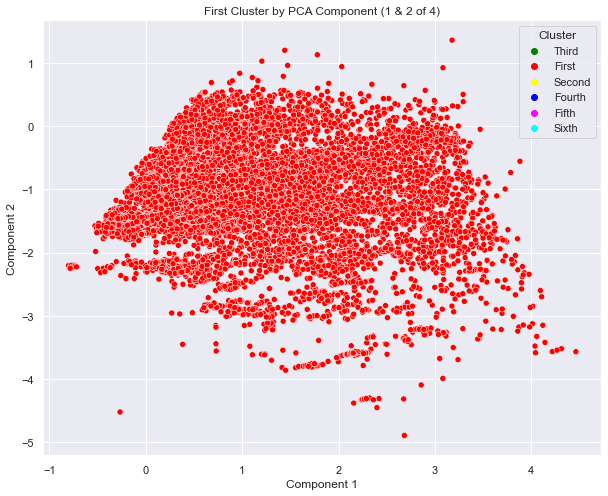

In [91]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('First Cluster by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster1['Component_1']
y_axis = kmeans_pca_cluster1['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

In [92]:
# View the size of the Cluster dataframe
kmeans_pca_cluster1.shape

(11675, 20)

In [93]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster1 = df_PR_Bemiss_rev[df_PR_Bemiss_rev['Kmeans_PCA_Cluster'] == 0]
df_Cluster1.shape

(11675, 30)

In [94]:
# View the details of the K-Means First Cluster
df_Cluster1.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  \
count    11675.000000     11675.000000                11675.000000   
unique            NaN              NaN                         NaN   
top               NaN              NaN                         NaN   
freq              NaN              NaN                         NaN   
mean     74305.703726       713.533790                  505.963426   
std      17186.368129       113.634115                  647.110483   
min         35.000000         0.000000                    0.000000   
25%      64632.000000       652.000000                    0.000000   
50%      76445.000000       693.000000                    0.000000   
75%      87504.000000       747.000000                 1147.000000   
max     101800.000000      2184.000000                 2538.000000   

         Built_as_SF  No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  \
count   11675.000000    11675.000000     11675.000000     11675.000000   
unique           NaN             NaN              NaN              NaN   
top              NaN             NaN              NaN              NaN   
freq             NaN             NaN              NaN              NaN   
mean     3366.836146        4.181756         3.937430         0.344194   
std       488.056309        0.591638         0.605818         0.736211   
min      1983.000000        2.000000         2.000000         0.064000   
25%      3026.000000        4.000000         4.000000         0.170000   
50%      3284.000000        4.000000         4.000000         0.207000   
75%      3624.000000        4.000000         4.000000         0.274000   
max      5880.000000        8.000000         6.000000        20.565000   

         Quality_ord  Condition_ord  Actual_Value  Total_Garage_SF_stan  \
count   11675.000000    11675.00000  1.167500e+04          11675.000000   
unique           NaN            NaN           NaN                   NaN   
top              NaN            NaN           NaN                   NaN   
freq             NaN            NaN           NaN                   NaN   
mean        3.742698        3.07666  5.269299e+05              0.249362   
std         0.585288        0.38722  1.067832e+05              0.420340   
min         0.000000        0.00000  2.545830e+05             -2.390045   
25%         3.000000        3.00000  4.506235e+05              0.021745   
50%         4.000000        3.00000  5.032890e+05              0.173407   
75%         4.000000        3.00000  5.795265e+05              0.373156   
max         6.000000        5.00000  1.041433e+06              5.688712   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                      11675.000000      11675.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                          -0.074862          0.882288   
std                            0.821865          0.598470   
min                           -0.717463         -0.814614   
25%                           -0.717463          0.464344   
50%                           -0.717463          0.780712   
75%                            0.739289          1.197630   
max                            2.505933          3.964006   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count          11675.000000          11675.000000          11675.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean               0.900915              0.943871             -0.081580   
std                0.652505              0.742094              0.280233   
min               -1.505296             -1.429374             -0.188234   
25%                0.700460              1.0205

In [95]:
df_Cluster1['Quality_ord'].unique()

array([4., 3., 5., 6., 0.])

In [96]:
df_Cluster1['Condition_ord'].unique()

array([3., 5., 4., 0.])

#### Cluster 2

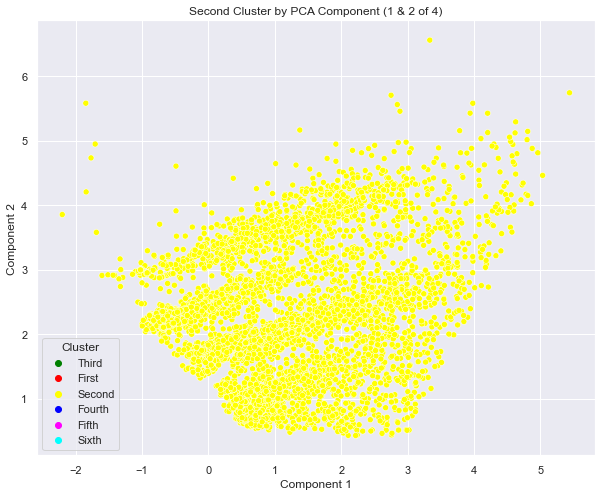

In [97]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Second Cluster by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster2['Component_1']
y_axis = kmeans_pca_cluster2['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

In [98]:
# View the size of the Cluster dataframe
kmeans_pca_cluster2.shape

(4332, 20)

In [99]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster2 = df_PR_Bemiss_rev[df_PR_Bemiss_rev['Kmeans_PCA_Cluster'] == 1]
df_Cluster2.shape

(4332, 30)

In [100]:
# View the details of the K-Means First Cluster
df_Cluster2.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  \
count     4332.000000      4332.000000                 4332.000000   
unique            NaN              NaN                         NaN   
top               NaN              NaN                         NaN   
freq              NaN              NaN                         NaN   
mean     62253.527008       837.649584                 1706.943444   
std      28415.722357       277.115002                  615.860029   
min         86.000000         0.000000                    0.000000   
25%      52820.250000       676.000000                 1385.750000   
50%      69786.500000       768.000000                 1712.500000   
75%      83563.500000       936.000000                 2093.250000   
max     101795.000000      3160.000000                 3837.000000   

        Built_as_SF  No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  \
count   4332.000000     4332.000000      4332.000000      4332.000000   
unique          NaN             NaN              NaN              NaN   
top             NaN             NaN              NaN              NaN   
freq            NaN             NaN              NaN              NaN   
mean    2626.654201        2.078486         2.609311         1.324550   
std      459.397278        0.761780         0.576528         2.191874   
min      352.000000        0.000000         0.000000         0.100000   
25%     2304.000000        2.000000         2.000000         0.213750   
50%     2570.000000        2.000000         3.000000         0.420000   
75%     2920.500000        3.000000         3.000000         1.014250   
max     4496.000000        5.000000         5.000000        20.000000   

        Quality_ord  Condition_ord  Actual_Value  Total_Garage_SF_stan  \
count   4332.000000    4332.000000  4.332000e+03           4332.000000   
unique          NaN            NaN           NaN                   NaN   
top             NaN            NaN           NaN                   NaN   
freq            NaN            NaN           NaN                   NaN   
mean       4.355725       3.112650  6.585586e+05              0.708475   
std        0.598780       0.460649  1.756754e+05              1.025066   
min        3.000000       3.000000  3.460000e+05             -2.390045   
25%        4.000000       3.000000  5.270828e+05              0.110522   
50%        4.000000       3.000000  6.265590e+05              0.450836   
75%        5.000000       3.000000  7.469565e+05              1.072279   
max        6.000000       5.000000  2.469728e+06              9.298999   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       4332.000000       4332.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                           1.450447         -0.025346   
std                            0.782175          0.563327   
min                           -0.717463         -2.814596   
25%                            1.042514         -0.420994   
50%                            1.457504         -0.094817   
75%                            1.941077          0.334977   
max                            4.155733          2.266903   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           4332.000000           4332.000000           4332.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -1.418736             -0.683002              0.291585   
std                0.840150              0.706215              0.834321   
min               -3.711053             -3.879264             -0.174531   
25%               -1.505296             -1.429374             -0.131233

In [101]:
df_Cluster2['Quality_ord'].unique()

array([4., 3., 5., 6.])

In [102]:
df_Cluster2['Condition_ord'].unique()

array([3., 5., 4.])

#### Cluster 3

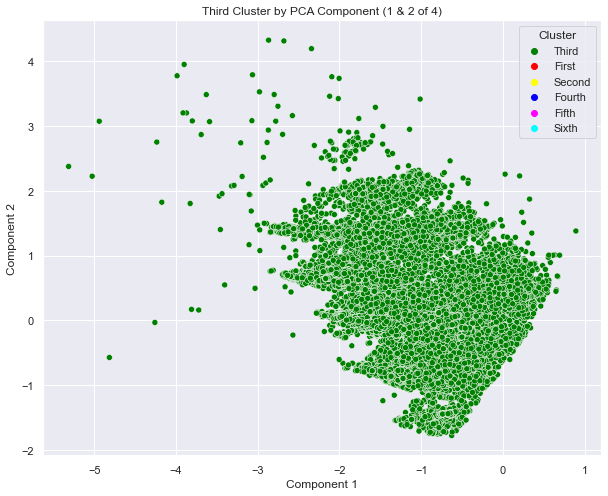

In [103]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Third Cluster by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster3['Component_1']
y_axis = kmeans_pca_cluster3['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

In [104]:
# View the size of the Cluster dataframe
kmeans_pca_cluster3.shape

(24981, 20)

In [105]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster3 = df_PR_Bemiss_rev[df_PR_Bemiss_rev['Kmeans_PCA_Cluster'] == 2]
df_Cluster3.shape

(24981, 30)

In [106]:
# View the details of the K-Means First Cluster
df_Cluster3.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  \
count    24981.000000     24981.000000                24981.000000   
unique            NaN              NaN                         NaN   
top               NaN              NaN                         NaN   
freq              NaN              NaN                         NaN   
mean     73033.567511       535.971498                  313.315160   
std      15773.922031       122.854502                  495.522009   
min         14.000000         0.000000                    0.000000   
25%      63383.000000       435.000000                    0.000000   
50%      74169.000000       497.000000                    0.000000   
75%      84782.000000       642.000000                  678.000000   
max     101764.000000      1440.000000                 2536.000000   

         Built_as_SF  No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  \
count   24981.000000    24981.000000     24981.000000     24981.000000   
unique           NaN             NaN              NaN              NaN   
top              NaN             NaN              NaN              NaN   
freq             NaN             NaN              NaN              NaN   
mean     2201.285857        3.213340         2.815582         0.200555   
std       441.612965        0.662753         0.444399         0.498570   
min         0.000000        0.000000         0.000000         0.000000   
25%      1906.000000        3.000000         3.000000         0.126000   
50%      2200.000000        3.000000         3.000000         0.152000   
75%      2528.000000        4.000000         3.000000         0.190000   
max      3974.000000        5.000000         5.000000        20.539991   

         Quality_ord  Condition_ord   Actual_Value  Total_Garage_SF_stan  \
count   24981.000000   24981.000000   24981.000000          24981.000000   
unique           NaN            NaN            NaN                   NaN   
top              NaN            NaN            NaN                   NaN   
freq             NaN            NaN            NaN                   NaN   
mean        3.060126       2.998479  370887.314239             -0.407452   
std         0.248751       0.066942   58581.900519              0.454447   
min         0.000000       0.000000       0.000000             -2.390045   
25%         3.000000       3.000000  331747.000000             -0.780952   
50%         3.000000       3.000000  368286.000000             -0.551610   
75%         3.000000       3.000000  407778.000000             -0.015246   
max         4.000000       3.000000  750000.000000              2.936608   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                      24981.000000      24981.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                          -0.319536         -0.546945   
std                            0.629340          0.541519   
min                           -0.717463         -3.246229   
25%                           -0.717463         -0.909034   
50%                           -0.717463         -0.548522   
75%                            0.143633         -0.146318   
max                            2.503393          1.626811   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count          24981.000000          24981.000000          24981.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -0.167130             -0.430332             -0.136255   
std                0.730936              0.544364              0.189777   
min               -3.711053             -3.879264             -0.212595   
25%               -0.402418        

In [107]:
df_Cluster3['Quality_ord'].unique()

array([3., 4., 2., 0.])

In [108]:
df_Cluster3['Condition_ord'].unique()

array([3., 0., 1.])

#### Cluster 4

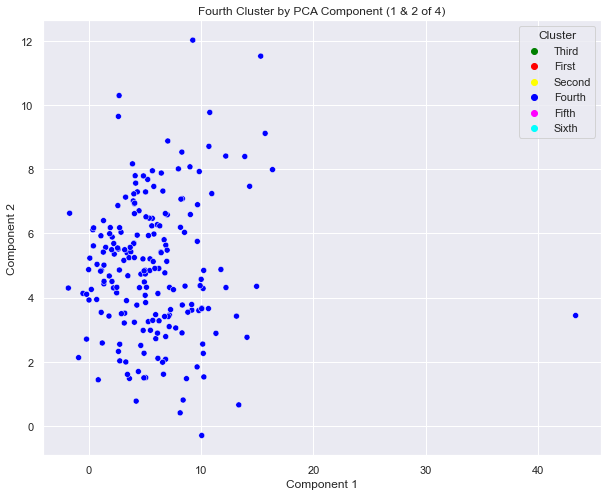

In [109]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fourth Cluster by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster4['Component_1']
y_axis = kmeans_pca_cluster4['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

In [110]:
# View the size of the Cluster dataframe
kmeans_pca_cluster4.shape

(200, 20)

In [111]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster4 = df_PR_Bemiss_rev[df_PR_Bemiss_rev['Kmeans_PCA_Cluster'] == 3]
df_Cluster4.shape

(200, 30)

In [112]:
# View the details of the K-Means First Cluster
df_Cluster4.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  \
count      200.000000       200.000000                  200.000000   
unique            NaN              NaN                         NaN   
top               NaN              NaN                         NaN   
freq              NaN              NaN                         NaN   
mean     51898.230000      1266.565000                 1627.215000   
std      24183.893181       911.332255                 2022.315604   
min        114.000000         0.000000                    0.000000   
25%      38670.250000       796.750000                    0.000000   
50%      50077.500000      1016.500000                 1582.500000   
75%      67052.250000      1482.750000                 2386.250000   
max     101799.000000      6632.000000                22450.000000   

         Built_as_SF  No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  \
count     200.000000      200.000000       200.000000       200.000000   
unique           NaN             NaN              NaN              NaN   
top              NaN             NaN              NaN              NaN   
freq             NaN             NaN              NaN              NaN   
mean     3559.285000        2.765000         3.425000        36.669776   
std      1772.549053        1.215385         1.648625        10.185895   
min       685.000000        1.000000         1.000000        19.319995   
25%      2389.250000        2.000000         2.000000        35.000000   
50%      3319.500000        3.000000         3.000000        35.098500   
75%      4378.500000        4.000000         4.000000        37.632000   
max     16807.000000        8.000000        18.000000        99.277000   

        Quality_ord  Condition_ord  Actual_Value  Total_Garage_SF_stan  \
count    200.000000     200.000000  2.000000e+02            200.000000   
unique          NaN            NaN           NaN                   NaN   
top             NaN            NaN           NaN                   NaN   
freq            NaN            NaN           NaN                   NaN   
mean       4.690000       3.200000  9.193971e+05              2.295061   
std        1.043718       0.634043  5.086649e+05              3.371077   
min        2.000000       1.000000  3.367400e+04             -2.390045   
25%        4.000000       3.000000  6.240040e+05              0.557185   
50%        5.000000       3.000000  8.098755e+05              1.370054   
75%        5.250000       3.000000  1.115358e+06              3.094743   
max        6.000000       5.000000  4.240026e+06             22.142152   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                        200.000000        200.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                           1.349187          1.118275   
std                            2.568449          2.173554   
min                           -0.717463         -2.406261   
25%                           -0.717463         -0.316458   
50%                            1.292397          0.824243   
75%                            2.313202          2.122821   
max                           27.795241         17.363028   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count            200.000000            200.000000            200.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -0.661594              0.316172             13.745485   
std                1.340422              2.019475              3.877186   
min               -2.608174             -2.654319              7.141419   
25%               -1.505296             -1.429374          

In [113]:
df_Cluster4['Quality_ord'].unique()

array([6., 5., 4., 3., 2.])

In [114]:
df_Cluster4['Condition_ord'].unique()

array([3., 5., 1.])

#### Cluster 5

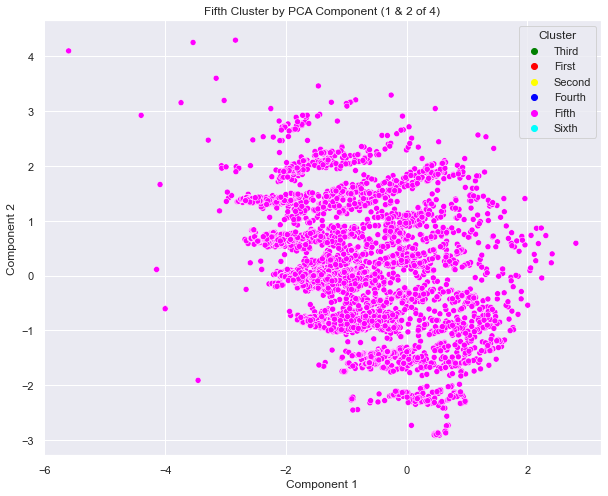

In [115]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fifth Cluster by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster5['Component_1']
y_axis = kmeans_pca_cluster5['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

In [116]:
# View the size of the Cluster dataframe
kmeans_pca_cluster5.shape

(5976, 20)

In [117]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster5 = df_PR_Bemiss_rev[df_PR_Bemiss_rev['Kmeans_PCA_Cluster'] == 4]
df_Cluster5.shape

(5976, 30)

In [118]:
# View the details of the K-Means First Cluster
df_Cluster5.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  \
count     5976.000000      5976.000000                 5976.000000   
unique            NaN              NaN                         NaN   
top               NaN              NaN                         NaN   
freq              NaN              NaN                         NaN   
mean     94610.007697       573.330321                  289.536145   
std      13020.427424       161.521173                  576.674920   
min        122.000000         0.000000                    0.000000   
25%      95449.750000       453.000000                    0.000000   
50%      98224.500000       518.000000                    0.000000   
75%     100154.250000       681.000000                    0.000000   
max     101813.000000      2140.000000                 2539.000000   

        Built_as_SF  No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  \
count   5976.000000     5976.000000      5976.000000      5976.000000   
unique          NaN             NaN              NaN              NaN   
top             NaN             NaN              NaN              NaN   
freq            NaN             NaN              NaN              NaN   
mean    2358.424029        3.179708         2.946518         0.227793   
std      554.798302        0.818661         0.667019         0.665643   
min        0.000000        0.000000         0.000000         0.035000   
25%     1932.000000        3.000000         3.000000         0.114000   
50%     2313.000000        3.000000         3.000000         0.150000   
75%     2748.000000        4.000000         3.000000         0.185000   
max     4919.000000        6.000000         5.000000        15.527000   

        Quality_ord  Condition_ord  Actual_Value  Total_Garage_SF_stan  \
count   5976.000000    5976.000000  5.976000e+03           5976.000000   
unique          NaN            NaN           NaN                   NaN   
top             NaN            NaN           NaN                   NaN   
freq            NaN            NaN           NaN                   NaN   
mean       3.128347       5.000335  4.198331e+05             -0.269259   
std        0.339963       0.031687  1.037591e+05              0.597477   
min        1.000000       4.000000  0.000000e+00             -2.390045   
25%        3.000000       5.000000  3.479500e+05             -0.714369   
50%        3.000000       5.000000  4.003320e+05             -0.473930   
75%        3.000000       5.000000  4.710812e+05              0.129018   
max        5.000000       7.000000  1.466135e+06              5.525953   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       5976.000000       5976.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                          -0.349737         -0.354258   
std                            0.732408          0.680311   
min                           -0.717463         -3.246229   
25%                           -0.717463         -0.877152   
50%                           -0.717463         -0.409958   
75%                           -0.717463          0.123452   
max                            2.507203          2.785599   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           5976.000000           5976.000000           5976.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -0.204222             -0.269941             -0.125887   
std                0.902884              0.817062              0.253372   
min               -3.711053             -3.879264             -0.199273   
25%               -0.402418             -0.204429             -0.169202

In [119]:
df_Cluster5['Quality_ord'].unique()

array([3., 4., 2., 5., 1.])

In [120]:
df_Cluster5['Condition_ord'].unique()

array([5., 4., 7., 6.])

#### Cluster 6

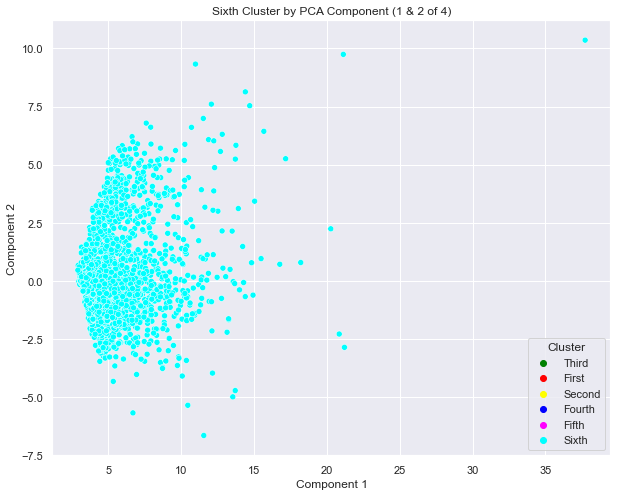

In [121]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Sixth Cluster by PCA Component (1 & 2 of 4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster6['Component_1']
y_axis = kmeans_pca_cluster6['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

In [122]:
# View the size of the Cluster dataframe
kmeans_pca_cluster6.shape

(2474, 20)

In [123]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster6 = df_PR_Bemiss_rev[df_PR_Bemiss_rev['Kmeans_PCA_Cluster'] == 5]
df_Cluster6.shape

(2474, 30)

In [124]:
# View the details of the K-Means First Cluster
df_Cluster6.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  \
count     2474.000000      2474.000000                 2474.000000   
unique            NaN              NaN                         NaN   
top               NaN              NaN                         NaN   
freq              NaN              NaN                         NaN   
mean     67250.636217      1230.531932                 1963.073969   
std      20055.402385       628.703697                 1009.517340   
min        303.000000       281.000000                    0.000000   
25%      59380.250000       866.000000                 1529.000000   
50%      70952.500000      1060.500000                 1935.500000   
75%      80827.250000      1349.000000                 2458.000000   
max     101816.000000      7745.000000                10501.000000   

         Built_as_SF  No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  \
count    2474.000000     2474.000000      2474.000000      2474.000000   
unique           NaN             NaN              NaN              NaN   
top              NaN             NaN              NaN              NaN   
freq             NaN             NaN              NaN              NaN   
mean     4416.029507        3.788407         4.565701         1.722673   
std      1017.550278        1.042065         1.048459         2.451713   
min      1798.000000        1.000000         2.000000         0.150000   
25%      3792.250000        3.000000         4.000000         0.397000   
50%      4249.000000        4.000000         4.000000         0.751505   
75%      4767.500000        4.000000         5.000000         1.778250   
max     15012.000000        8.000000         9.000000        20.010009   

        Quality_ord  Condition_ord  Actual_Value  Total_Garage_SF_stan  \
count   2474.000000    2474.000000  2.474000e+03           2474.000000   
unique          NaN            NaN           NaN                   NaN   
top             NaN            NaN           NaN                   NaN   
freq            NaN            NaN           NaN                   NaN   
mean       5.221504       3.136621  1.089345e+06              2.161772   
std        0.518410       0.503856  4.504918e+05              2.325616   
min        3.000000       3.000000  5.121810e+05             -1.350608   
25%        5.000000       3.000000  8.472015e+05              0.813345   
50%        5.000000       3.000000  9.707105e+05              1.532813   
75%        6.000000       3.000000  1.184557e+06              2.599993   
max        6.000000       5.000000  7.560927e+06             26.259212   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       2474.000000       2474.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                           1.775746          2.168841   
std                            1.282141          1.247751   
min                           -0.717463         -1.041467   
25%                            1.224449          1.403944   
50%                            1.740726          1.964024   
75%                            2.404329          2.599825   
max                           12.619370         15.161944   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           2474.000000           2474.000000           2474.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean               0.467099              1.713467              0.443128   
std                1.149271              1.284305              0.933226   
min               -2.608174             -1.429374             -0.155499   
25%               -0.402418              1.020516          

In [125]:
df_Cluster6['Quality_ord'].unique()

array([5., 4., 6., 3.])

In [126]:
df_Cluster6['Condition_ord'].unique()

array([3., 5., 4.])

### Write File for MLRegression and Geocoding

In [127]:
df_PR_Bemiss_rev.head()

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
0          14              0.0                         0.0       1848.0   
1          29           1007.0                      1152.0       2649.0   
2          34            600.0                         0.0       2414.0   
3          35            786.0                         0.0       4345.0   
4          36            576.0                         0.0       2153.0   

   No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
0             2.0              2.0         1.000000          3.0   
1             3.0              3.0         1.880005          3.0   
2             3.0              2.0         2.280005          3.0   
3             3.0              3.0         2.389991          4.0   
4             3.0              3.0         2.400000          4.0   

   Condition_ord  Actual_Value  Total_Garage_SF_stan  \
0            3.0      246222.0             -2.390045   
1            3.0      528012.0              1.334913   
2            3.0      394601.0             -0.170606   
3            3.0      646822.0              0.517420   
4            3.0      411464.0             -0.259384   

   Total_Finished_Basement_SF_stan  Built_as_SF_stan  No_of_Bedrooms_stan  \
0                        -0.717463         -0.980155            -1.505296   
1                         0.745639          0.002055            -0.402418   
2                        -0.717463         -0.286109            -0.402418   
3                        -0.717463          2.081743            -0.402418   
4                        -0.717463         -0.606155            -0.402418   

   No_of_Bathrooms_stan  Total_Net_Acres_stan  Quality_ord_stan  \
0             -1.429374              0.168048         -0.633965   
1             -0.204429              0.503015         -0.633965   
2             -1.429374              0.655272         -0.633965   
3             -0.204429              0.697137          0.755568   
4             -0.204429              0.700947          0.755568   

   Condition_ord_stan  Actual_Value_stan  Component_1  Component_2  \
0           -0.397782          -1.045625    -2.973523     1.076176   
1           -0.397782           0.233313     0.580985     0.892870   
2           -0.397782          -0.372189    -1.257211     0.736522   
3           -0.397782           0.772547     1.600009     0.045381   
4           -0.397782          -0.295654    -0.388834     0.482359   

   Component_3  Component_4  Component_5  Component_6  Component_7  \
0    -0.552057     0.187233    -0.350274    -1.507954    -0.007151   
1    -0.293770     0.371584     0.047608     1.325014     0.397417   
2    -0.353028     0.850286     0.410968     0.143392    -0.633344   
3    -0.160905     0.597870     1.065155    -0.640143    -0.453129   
4    -0.362387     0.760702     0.561982    -0.816539    -0.119712   

   Component_8  Component_9  Kmeans_PCA_Cluster Cluster  
0     0.338707    -0.572107                   2   Third  
1     0.366472     0.000734                   2   Third  
2     0.516571    -0.361568                   2   Third  
3     0.853806    -1.306799                   0   First  
4    -0.565452     0.224856                   2   Third

In [128]:
#### Write to a file 
df_PR_Bemiss_rev.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_Property_Analys_PR.csv')

## Unsupervised Clustering - Properties with Garage SF >= 690

In [129]:
# Identify Rows (Garage size = 24 x 29 or greater dimensions )
is_GSF = df_PR_Bemiss_rev['Total_Garage_SF']>=690

In [130]:
# Filter the dataframe to Build Year >= 2000
df_PR_Garage = df_PR_Bemiss_rev[is_GSF]
print(df_PR_Garage.shape)

(15815, 30)


In [131]:
# View the first few rows of data
df_PR_Garage.head()

orig_index  Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
1          29           1007.0                      1152.0       2649.0   
3          35            786.0                         0.0       4345.0   
5          52            936.0                         0.0       2599.0   
7          86           1464.0                         0.0       2260.0   
8         105           1844.0                      1552.0       1941.0   

   No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
1             3.0              3.0         1.880005          3.0   
3             3.0              3.0         2.389991          4.0   
5             3.0              3.0         1.000000          3.0   
7             3.0              2.0         1.019995          4.0   
8             2.0              3.0         1.037006          4.0   

   Condition_ord  Actual_Value  Total_Garage_SF_stan  \
1            3.0      528012.0              1.334913   
3            3.0      646822.0              0.517420   
5            3.0      432353.0              1.072279   
7            3.0      498921.0              3.025386   
8            3.0      584144.0              4.431030   

   Total_Finished_Basement_SF_stan  Built_as_SF_stan  No_of_Bedrooms_stan  \
1                         0.745639          0.002055            -0.402418   
3                        -0.717463          2.081743            -0.402418   
5                        -0.717463         -0.059256            -0.402418   
7                        -0.717463         -0.474948            -0.402418   
8                         1.253660         -0.866116            -1.505296   

   No_of_Bathrooms_stan  Total_Net_Acres_stan  Quality_ord_stan  \
1             -0.204429              0.503015         -0.633965   
3             -0.204429              0.697137          0.755568   
5             -0.204429              0.168048         -0.633965   
7             -1.429374              0.175659          0.755568   
8             -0.204429              0.182134          0.755568   

   Condition_ord_stan  Actual_Value_stan  Component_1  Component_2  \
1           -0.397782           0.233313     0.580985     0.892870   
3           -0.397782           0.772547     1.600009     0.045381   
5           -0.397782          -0.200847    -0.259819     0.182015   
7           -0.397782           0.101280     0.663087     1.461895   
8           -0.397782           0.488075     2.105370     2.697023   

   Component_3  Component_4  Component_5  Component_6  Component_7  \
1    -0.293770     0.371584     0.047608     1.325014     0.397417   
3    -0.160905     0.597870     1.065155    -0.640143    -0.453129   
5    -0.243971     0.517731     1.064994     0.851492     0.316695   
7    -0.195042     0.434761     2.426941     1.727885    -0.886223   
8    -0.169066    -0.149232     1.878470     2.773227     0.890523   

   Component_8  Component_9  Kmeans_PCA_Cluster Cluster  
1     0.366472     0.000734                   2   Third  
3     0.853806    -1.306799                   0   First  
5     0.320648    -0.099670                   2   Third  
7    -0.584835     0.248259                   1  Second  
8    -0.992213     0.713953                   1  Second

In [132]:
# Filter to features that I am interested in
# create copy of dataframe to work with
df_Garage_copy = df_PR_Garage.copy()

#List of features I am interested in
features = ['Total_Garage_SF','Total_Finished_Basement_SF','Built_as_SF','No_of_Bedrooms','No_of_Bathrooms'
            ,'Total_Net_Acres','Quality_ord','Condition_ord','Actual_Value']

# Filter dataframe to list of features
df_Bemiss = df_Garage_copy[['Total_Garage_SF','Total_Finished_Basement_SF','Built_as_SF','No_of_Bedrooms','No_of_Bathrooms'
            ,'Total_Net_Acres','Quality_ord','Condition_ord','Actual_Value']]

df_Bemiss.shape

(15815, 9)

In [133]:
# View first few rows
df_Bemiss.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
1           1007.0                      1152.0       2649.0             3.0   
3            786.0                         0.0       4345.0             3.0   
5            936.0                         0.0       2599.0             3.0   
7           1464.0                         0.0       2260.0             3.0   
8           1844.0                      1552.0       1941.0             2.0   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  
1              3.0         1.880005          3.0            3.0      528012.0  
3              3.0         2.389991          4.0            3.0      646822.0  
5              3.0         1.000000          3.0            3.0      432353.0  
7              2.0         1.019995          4.0            3.0      498921.0  
8              3.0         1.037006          4.0            3.0      584144.0

In [134]:
# Copy the data
df_Bemiss_stan = df_Bemiss.copy()
##### Scale the data 
scaler = StandardScaler()
df_Bemiss_stan[features]=scaler.fit_transform(df_Bemiss_stan[features])
df_Bemiss_stan.head(5)

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
1         0.352227                    0.190802    -0.677226       -0.403838   
3        -0.281460                   -0.960048     1.266390       -0.403838   
5         0.148644                   -0.960048    -0.734526       -0.403838   
7         1.662611                   -0.960048    -1.123020       -0.403838   
8         2.752208                    0.590403    -1.488594       -1.329677   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  
1        -0.546858         0.154712    -1.168108      -0.379098     -0.372723  
3        -0.546858         0.277285    -0.032527      -0.379098      0.024409  
5        -0.546858        -0.056794    -1.168108      -0.379098     -0.692470  
7        -1.546596        -0.051989    -0.032527      -0.379098     -0.469962  
8        -0.546858        -0.047900    -0.032527      -0.379098     -0.185097

In [135]:
df_Bemiss_stan.shape

(15815, 9)

In [136]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(1, df_Bemiss_stan.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_Bemiss_stan)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df_Bemiss_stan)
cluster_df=Final_PCA.transform(df_Bemiss_stan)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 5 components, we can explain 0.8846075344039106% of the variability in the original data.


In [194]:
# Find the number of components for 99%
Final_PCA = PCA(n_components= 9,random_state=42)
Final_PCA.fit(df_Bemiss_stan)
cluster_df=Final_PCA.transform(df_Bemiss_stan)
comp_check = Final_PCA.explained_variance_ratio_
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(9,comp_check.sum()))

Using 9 components, we can explain 1.0000000000000002% of the variability in the original data.


In [138]:
# Create Dataframe of Principle Components of PCA
PCA_PR_g = pd.DataFrame(data = cluster_df)
PCA_PR_g.shape

(15815, 9)

In [139]:
# View the first few rows of dataframe
PCA_PR_g.head()

0         1         2         3         4         5         6  \
0 -0.939476  0.734813 -0.216981  0.429883  0.616099  0.704506  0.408460   
1  0.013881 -0.190185 -0.259084  0.400643 -0.161116 -0.963760  0.895641   
2 -1.630621  0.264146 -0.197099  0.566511  0.758490 -0.173594  0.413371   
3 -0.948682  1.398034 -0.071539  0.677467  1.817452 -0.784683 -0.303848   
4  0.206438  2.329217  0.065250  0.381818  2.361174  0.254894 -0.731774   

          7         8  
0 -0.206646  0.111356  
1  0.000730 -1.126091  
2 -0.262299  0.052789  
3  0.734354  0.038572  
4 -0.481514  0.601819

In [140]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA.explained_variance_ratio_))

Explained variation per principal component: [0.37075446 0.23364882 0.11335468 0.10306531 0.06378425 0.04751985
 0.02676451 0.02291783 0.01819028]


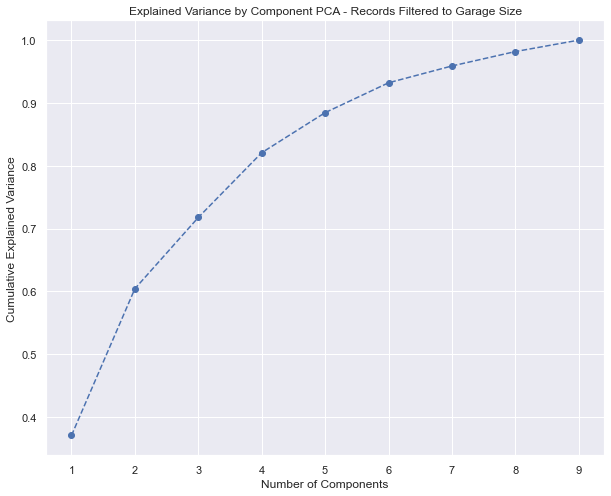

In [141]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component PCA - Records Filtered to Garage Size')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,10), Final_PCA.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

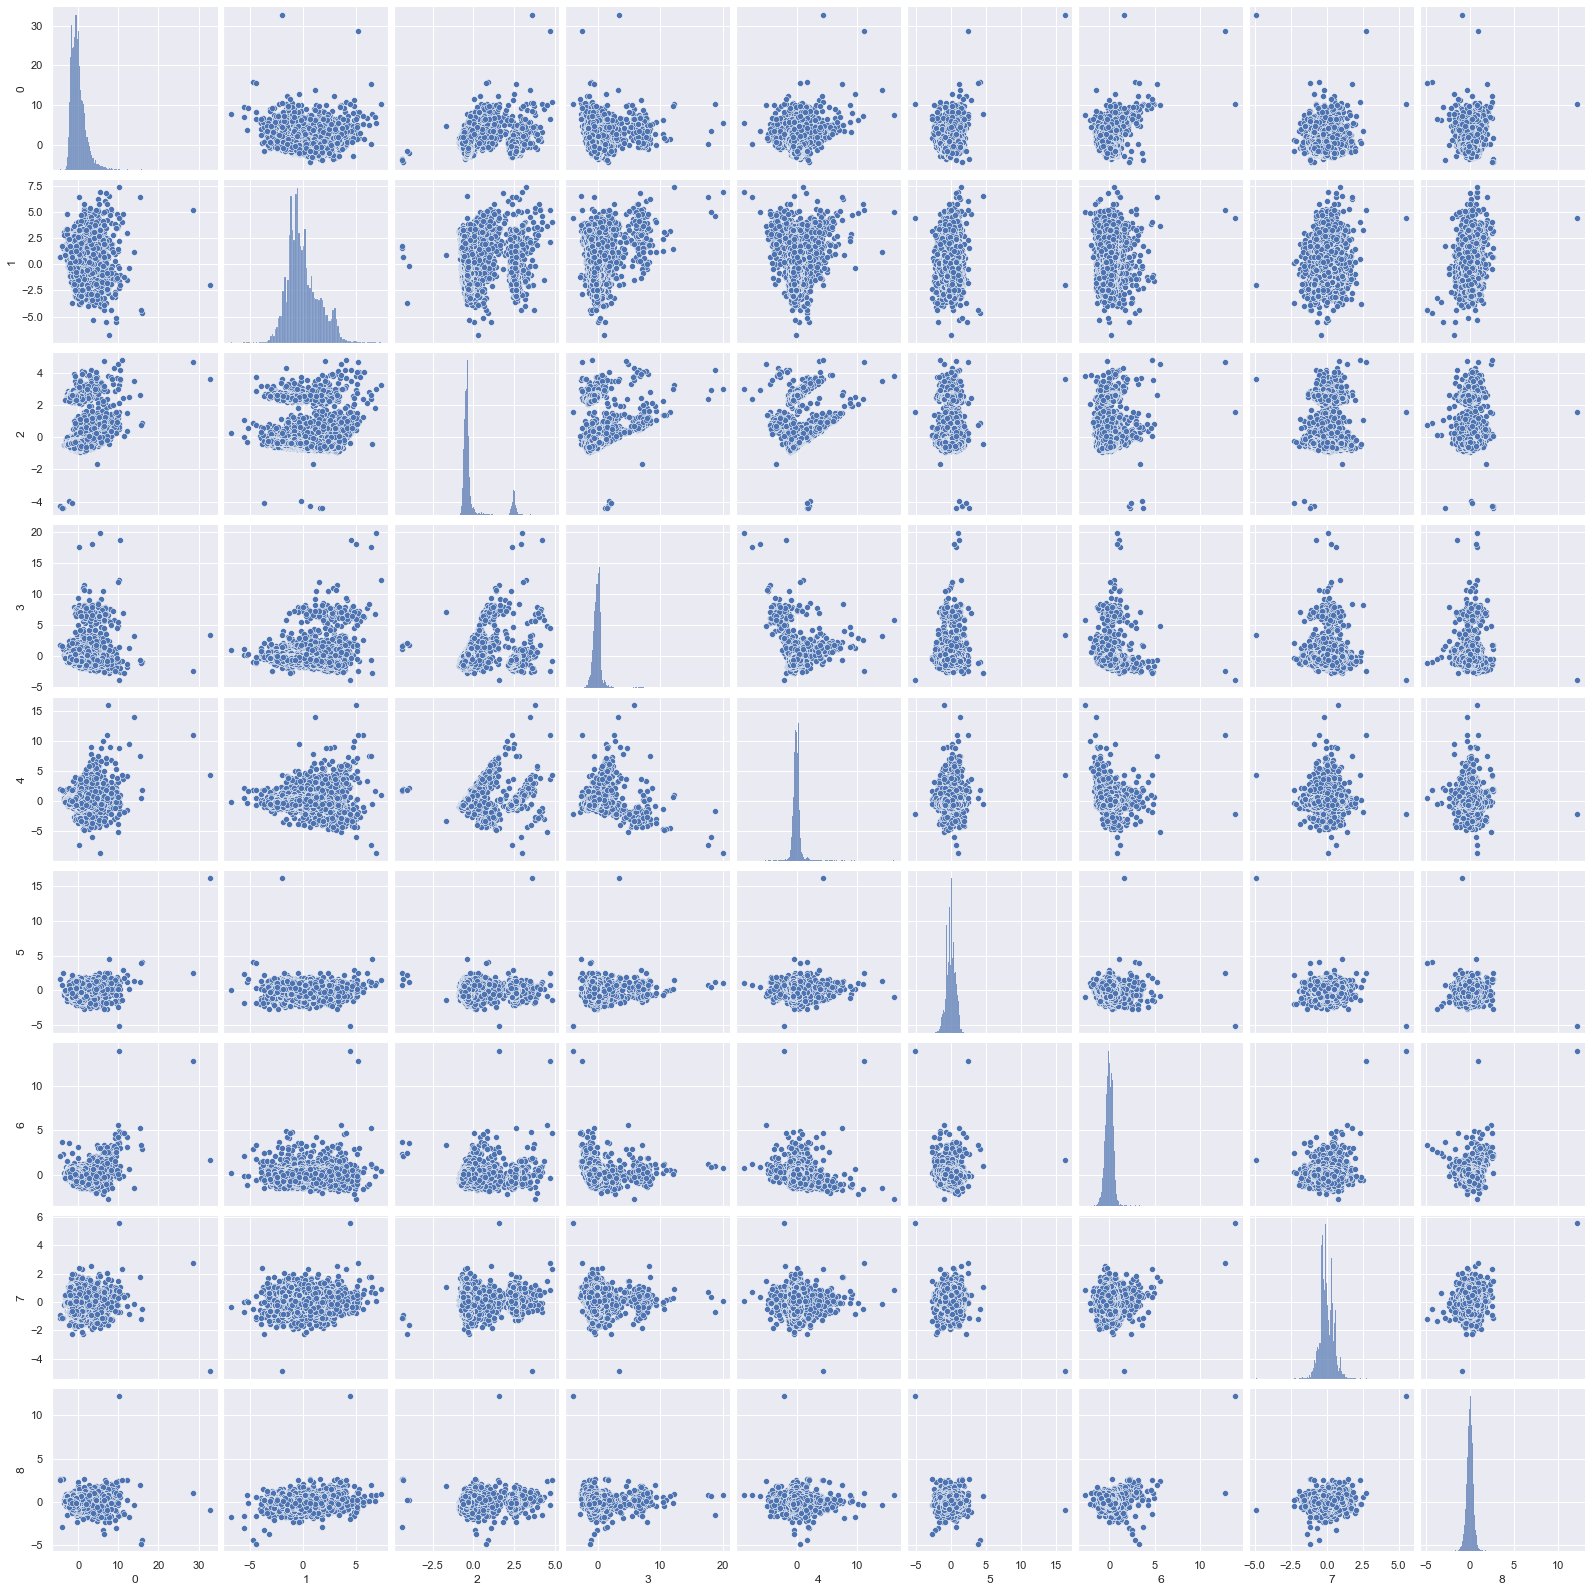

In [142]:
# Plot the PCA Components
sns.pairplot(PCA_PR_g)

#### Heat-Map of Components to Variables

In [143]:
# View the first 3 PCA Components and the first 10 variables
Final_PCA.components_[0:10,0:10]

array([[ 0.34908415,  0.35035217,  0.4385682 ,  0.04625722,  0.29650386,
         0.17653139,  0.45082285, -0.0734477 ,  0.48290593],
       [ 0.19920411,  0.3246827 , -0.33295493, -0.63020561, -0.52278145,
         0.21214482,  0.13909138, -0.00584344,  0.09588711],
       [ 0.19797548, -0.103384  ,  0.02503951, -0.01849658,  0.04851062,
         0.14214591, -0.11942699,  0.95133598,  0.08536202],
       [ 0.23435875, -0.26003742, -0.01649242,  0.1457412 ,  0.03710221,
         0.8638719 , -0.15041181, -0.20485508, -0.20905374],
       [ 0.84796004, -0.18324716, -0.05134999,  0.04980956, -0.05006469,
        -0.38757581, -0.24620771, -0.15910928, -0.06009127],
       [ 0.0282217 ,  0.79179535, -0.05488967,  0.27867244,  0.06207752,
         0.06018746, -0.51043478,  0.02440099, -0.15158244],
       [-0.15601878, -0.17260512,  0.32563185, -0.1671623 , -0.2018424 ,
         0.04620099, -0.61083441, -0.12670364,  0.61631072],
       [ 0.00642798, -0.01195336, -0.06801755,  0.67113234, -0

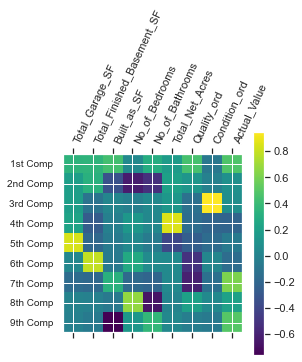

In [144]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA.components_[0:10,0:10],cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp','7th Comp'
                     ,'8th Comp','9th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features[0:10])),features[0:10],rotation=65,ha='left')

plt.show()# 

### Unsupervised Cluster Analysis: K-Means

##### Determine the "n" - # of clusters: Elbow Metho

In [145]:
# find the appropriate cluster number
sse = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_PR_g)
    sse.append(kmeans.inertia_)

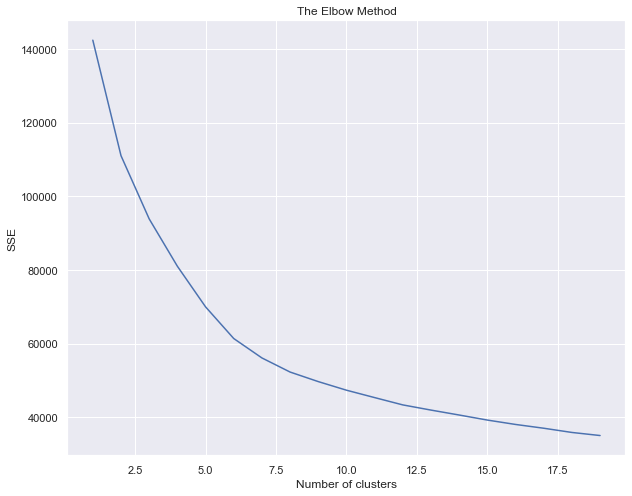

In [146]:
# Plot the sse to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 20), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

##### Determine the "n" - # of clusters: KneeLocator (Kneed Library)

In [147]:
# Use another method with package Kneed
kl_2 = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

kl_2.elbow

6

#### K-Means Clustering using PCA Components

In [148]:
# Set KMeans algorithm variables - n = 6, when run with 6 there are no records in the 6th cluster.
kmeans = KMeans(
    init="k-means++",
    n_clusters=5,
    random_state=42
)
# fit the data to the model
kmeans.fit_predict(PCA_PR_g)

array([1, 1, 1, ..., 0, 2, 0])

In [149]:
# The lowest SSE value
kmeans.inertia_

69984.93476173171

In [150]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 4.27198066e-01,  2.18722450e+00, -3.38478496e-01,
        -3.74001601e-01, -2.51941155e-02, -3.08928119e-02,
        -1.44437749e-01, -8.90040419e-02, -2.91957266e-02],
       [-8.84754140e-01, -4.65514913e-01, -4.00910235e-01,
         1.82685997e-01,  1.33644782e-01,  2.76278815e-02,
         8.49885705e-02,  1.77427864e-02,  1.19816030e-02],
       [ 2.52304922e+00, -8.49522365e-01, -1.94598948e-01,
        -2.65610915e-01, -6.29449374e-02, -1.01196118e-01,
        -6.13967424e-02,  3.29207555e-02,  1.58557791e-02],
       [-1.01112193e+00, -1.79604797e-01,  2.49518822e+00,
        -4.79817359e-01, -2.48797427e-01,  4.83377178e-02,
        -9.59389396e-02, -1.11728780e-03, -4.92993271e-02],
       [ 3.75154570e+00,  2.74918035e+00,  1.31641332e+00,
         6.99113271e+00, -2.27317220e+00,  3.69051774e-01,
         3.52856683e-01,  6.39967390e-02,  1.64774241e-01]])

In [151]:
# The number of iterations required to converge
kmeans.n_iter_

12

In [152]:
# View the predicted "Labels" for the first 5 properties
kmeans.labels_[:5]

array([1, 1, 1, 1, 0])

#### Analyze Results of K-Means Clustering with PCA

In [153]:
# Create a new dataframe containing original features and the components
# Original Data: df_Bemiss_stan
# Components: PCA_PR
df_kmeans_segm_g = pd.concat([df_Bemiss_stan.reset_index(drop = True), PCA_PR_g], axis = 1)

# Rename the columns for the PCA Components
df_kmeans_segm_g.columns.values[-9:] = ['Component_1','Component_2','Component_3','Component_4','Component_5'
                                     ,'Component_6','Component_7','Component_8','Component_9']

# Add the PCA clustering labels
df_kmeans_segm_g['Kmeans_PCA_Cluster'] = kmeans.labels_

# Add the names of the clusters
df_kmeans_segm_g['Cluster'] = df_kmeans_segm_g['Kmeans_PCA_Cluster'].map({0:'First'
                                                                      ,1:'Second'
                                                                      ,2:'Third'
                                                                      ,3:'Fourth'
                                                                      ,4:'Fifth'
                                                                      ,6:'Sixth'})

df_kmeans_segm_g.shape

(15815, 20)

In [154]:
# View first few records
df_kmeans_segm_g.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
0         0.352227                    0.190802    -0.677226       -0.403838   
1        -0.281460                   -0.960048     1.266390       -0.403838   
2         0.148644                   -0.960048    -0.734526       -0.403838   
3         1.662611                   -0.960048    -1.123020       -0.403838   
4         2.752208                    0.590403    -1.488594       -1.329677   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  \
0        -0.546858         0.154712    -1.168108      -0.379098     -0.372723   
1        -0.546858         0.277285    -0.032527      -0.379098      0.024409   
2        -0.546858        -0.056794    -1.168108      -0.379098     -0.692470   
3        -1.546596        -0.051989    -0.032527      -0.379098     -0.469962   
4        -0.546858        -0.047900    -0.032527      -0.379098     -0.185097   

   Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -0.939476     0.734813    -0.216981     0.429883     0.616099   
1     0.013881    -0.190185    -0.259084     0.400643    -0.161116   
2    -1.630621     0.264146    -0.197099     0.566511     0.758490   
3    -0.948682     1.398034    -0.071539     0.677467     1.817452   
4     0.206438     2.329217     0.065250     0.381818     2.361174   

   Component_6  Component_7  Component_8  Component_9  Kmeans_PCA_Cluster  \
0     0.704506     0.408460    -0.206646     0.111356                   1   
1    -0.963760     0.895641     0.000730    -1.126091                   1   
2    -0.173594     0.413371    -0.262299     0.052789                   1   
3    -0.784683    -0.303848     0.734354     0.038572                   1   
4     0.254894    -0.731774    -0.481514     0.601819                   0   

  Cluster  
0  Second  
1  Second  
2  Second  
3  Second  
4   First

In [155]:
# Changing columns name with index number
df_kmeans_segm_g.rename(columns={df_kmeans_segm_g.columns[0]:'Total_Garage_SF_stan'
         , df_kmeans_segm_g.columns[1]:'Total_Finished_Basement_SF_stan'
          ,df_kmeans_segm_g.columns[2]:'Built_as_SF_stan'
          ,df_kmeans_segm_g.columns[3]:'No_of_Bedrooms_stan'
          ,df_kmeans_segm_g.columns[4]:'No_of_Bathrooms_stan'
          ,df_kmeans_segm_g.columns[5]:'Total_Net_Acres_stan'
          ,df_kmeans_segm_g.columns[6]:'Quality_ord_stan'
          ,df_kmeans_segm_g.columns[7]:'Condition_ord_stan'
          ,df_kmeans_segm_g.columns[8]:'Actual_Value_stan'},inplace = True)
df_kmeans_segm_g.head()

Total_Garage_SF_stan  Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
0              0.352227                         0.190802         -0.677226   
1             -0.281460                        -0.960048          1.266390   
2              0.148644                        -0.960048         -0.734526   
3              1.662611                        -0.960048         -1.123020   
4              2.752208                         0.590403         -1.488594   

   No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
0            -0.403838             -0.546858              0.154712   
1            -0.403838             -0.546858              0.277285   
2            -0.403838             -0.546858             -0.056794   
3            -0.403838             -1.546596             -0.051989   
4            -1.329677             -0.546858             -0.047900   

   Quality_ord_stan  Condition_ord_stan  Actual_Value_stan  Component_1  \
0         -1.168108           -0.379098          -0.372723    -0.939476   
1         -0.032527           -0.379098           0.024409     0.013881   
2         -1.168108           -0.379098          -0.692470    -1.630621   
3         -0.032527           -0.379098          -0.469962    -0.948682   
4         -0.032527           -0.379098          -0.185097     0.206438   

   Component_2  Component_3  Component_4  Component_5  Component_6  \
0     0.734813    -0.216981     0.429883     0.616099     0.704506   
1    -0.190185    -0.259084     0.400643    -0.161116    -0.963760   
2     0.264146    -0.197099     0.566511     0.758490    -0.173594   
3     1.398034    -0.071539     0.677467     1.817452    -0.784683   
4     2.329217     0.065250     0.381818     2.361174     0.254894   

   Component_7  Component_8  Component_9  Kmeans_PCA_Cluster Cluster  
0     0.408460    -0.206646     0.111356                   1  Second  
1     0.895641     0.000730    -1.126091                   1  Second  
2     0.413371    -0.262299     0.052789                   1  Second  
3    -0.303848     0.734354     0.038572                   1  Second  
4    -0.731774    -0.481514     0.601819                   0   First

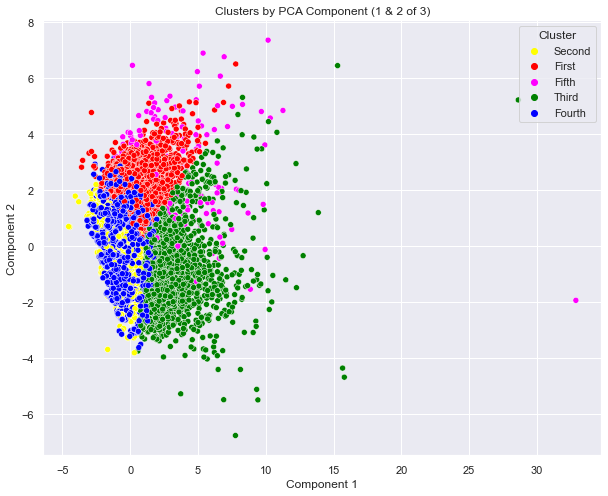

In [156]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (1 & 2 of 3)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_kmeans_segm_g['Component_1']
y_axis = df_kmeans_segm_g['Component_2']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

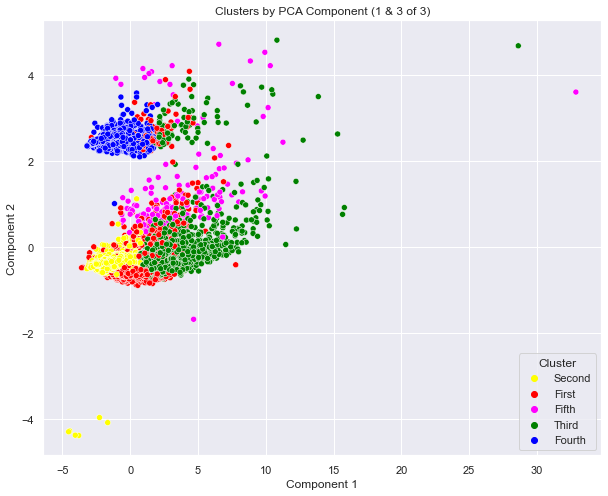

In [157]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (1 & 3 of 3)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_kmeans_segm_g['Component_1']
y_axis = df_kmeans_segm_g['Component_3']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

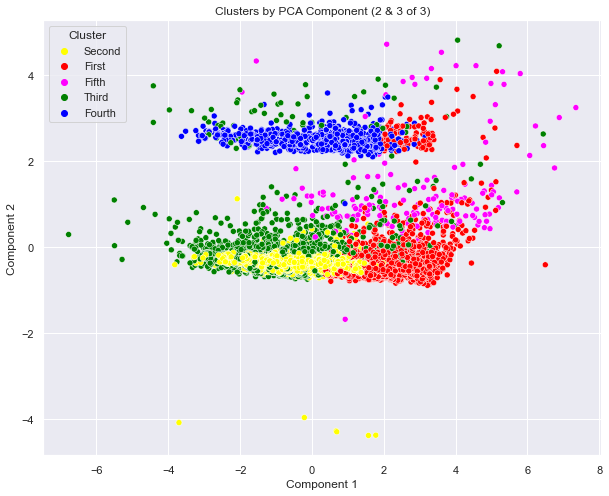

In [158]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (2 & 3 of 3)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_kmeans_segm_g['Component_2']
y_axis = df_kmeans_segm_g['Component_3']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

#### Performance Evaluation

##### The Silhouette Coefficient
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters.

    - Close to -1:incorrect clustering
    - Close to 0: overlapping clusters.
    - Close to 1:highly dense clustering

In [159]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels4 = kmeans.labels_
silhouette4 = metrics.silhouette_score(PCA_PR_g, labels4, metric='euclidean')
silhouette4

0.32766869366367807

##### Calinski-Harabasz Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.

In [160]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski4 = metrics.calinski_harabasz_score(PCA_PR_g, labels4)
Calinski4

4086.0954559122147

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [161]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies4 = davies_bouldin_score(PCA_PR_g, labels4)
Davies4

1.0776273228349418

In [162]:
# Create a dataframe with the 3 performance evaluation methods
Metric4 = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval4 = [silhouette4,Calinski4,Davies4]
Performance_Evaluation4 = pd.DataFrame(Eval4,index=Metric4,columns=['KMEANS_PCA'])
Performance_Evaluation4

KMEANS_PCA
Silhouette            0.327669
Calinski-Harabasz  4086.095456
Davies-Bouldin        1.077627

### Review Clusters

In [163]:
# get the original index values
bemiss_g = df_PR_Garage['orig_index']
bemiss_g

1            29
3            35
5            52
7            86
8           105
          ...  
49626    101786
49628    101794
49629    101795
49632    101805
49637    101816
Name: orig_index, Length: 15815, dtype: int64

In [164]:
# Concat the orig index
df_Bemiss_index = pd.concat([df_Bemiss, bemiss_g], axis = 1)
df_Bemiss_index.shape

(15815, 10)

In [165]:
df_Bemiss_index.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
1           1007.0                      1152.0       2649.0             3.0   
3            786.0                         0.0       4345.0             3.0   
5            936.0                         0.0       2599.0             3.0   
7           1464.0                         0.0       2260.0             3.0   
8           1844.0                      1552.0       1941.0             2.0   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  \
1              3.0         1.880005          3.0            3.0      528012.0   
3              3.0         2.389991          4.0            3.0      646822.0   
5              3.0         1.000000          3.0            3.0      432353.0   
7              2.0         1.019995          4.0            3.0      498921.0   
8              3.0         1.037006          4.0            3.0      584144.0   

   orig_index  
1          29  
3          35  
5          52  
7          86  
8         105

In [166]:
df_kmeans_segm_g.head()

Total_Garage_SF_stan  Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
0              0.352227                         0.190802         -0.677226   
1             -0.281460                        -0.960048          1.266390   
2              0.148644                        -0.960048         -0.734526   
3              1.662611                        -0.960048         -1.123020   
4              2.752208                         0.590403         -1.488594   

   No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
0            -0.403838             -0.546858              0.154712   
1            -0.403838             -0.546858              0.277285   
2            -0.403838             -0.546858             -0.056794   
3            -0.403838             -1.546596             -0.051989   
4            -1.329677             -0.546858             -0.047900   

   Quality_ord_stan  Condition_ord_stan  Actual_Value_stan  Component_1  \
0         -1.168108           -0.379098          -0.372723    -0.939476   
1         -0.032527           -0.379098           0.024409     0.013881   
2         -1.168108           -0.379098          -0.692470    -1.630621   
3         -0.032527           -0.379098          -0.469962    -0.948682   
4         -0.032527           -0.379098          -0.185097     0.206438   

   Component_2  Component_3  Component_4  Component_5  Component_6  \
0     0.734813    -0.216981     0.429883     0.616099     0.704506   
1    -0.190185    -0.259084     0.400643    -0.161116    -0.963760   
2     0.264146    -0.197099     0.566511     0.758490    -0.173594   
3     1.398034    -0.071539     0.677467     1.817452    -0.784683   
4     2.329217     0.065250     0.381818     2.361174     0.254894   

   Component_7  Component_8  Component_9  Kmeans_PCA_Cluster Cluster  
0     0.408460    -0.206646     0.111356                   1  Second  
1     0.895641     0.000730    -1.126091                   1  Second  
2     0.413371    -0.262299     0.052789                   1  Second  
3    -0.303848     0.734354     0.038572                   1  Second  
4    -0.731774    -0.481514     0.601819                   0   First

In [167]:
df_kmeans_segm_g.shape

(15815, 20)

In [168]:
# Concat the base data with the PCA and Cluster Data
df_Bemiss_rev = pd.concat([df_Bemiss_index.reset_index(drop = True), df_kmeans_segm_g], axis = 1)
df_Bemiss_rev.shape


(15815, 30)

In [169]:
# View the first few records
df_Bemiss_rev.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
0           1007.0                      1152.0       2649.0             3.0   
1            786.0                         0.0       4345.0             3.0   
2            936.0                         0.0       2599.0             3.0   
3           1464.0                         0.0       2260.0             3.0   
4           1844.0                      1552.0       1941.0             2.0   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  \
0              3.0         1.880005          3.0            3.0      528012.0   
1              3.0         2.389991          4.0            3.0      646822.0   
2              3.0         1.000000          3.0            3.0      432353.0   
3              2.0         1.019995          4.0            3.0      498921.0   
4              3.0         1.037006          4.0            3.0      584144.0   

   orig_index  Total_Garage_SF_stan  Total_Finished_Basement_SF_stan  \
0          29              0.352227                         0.190802   
1          35             -0.281460                        -0.960048   
2          52              0.148644                        -0.960048   
3          86              1.662611                        -0.960048   
4         105              2.752208                         0.590403   

   Built_as_SF_stan  No_of_Bedrooms_stan  No_of_Bathrooms_stan  \
0         -0.677226            -0.403838             -0.546858   
1          1.266390            -0.403838             -0.546858   
2         -0.734526            -0.403838             -0.546858   
3         -1.123020            -0.403838             -1.546596   
4         -1.488594            -1.329677             -0.546858   

   Total_Net_Acres_stan  Quality_ord_stan  Condition_ord_stan  \
0              0.154712         -1.168108           -0.379098   
1              0.277285         -0.032527           -0.379098   
2             -0.056794         -1.168108           -0.379098   
3             -0.051989         -0.032527           -0.379098   
4             -0.047900         -0.032527           -0.379098   

   Actual_Value_stan  Component_1  Component_2  Component_3  Component_4  \
0          -0.372723    -0.939476     0.734813    -0.216981     0.429883   
1           0.024409     0.013881    -0.190185    -0.259084     0.400643   
2          -0.692470    -1.630621     0.264146    -0.197099     0.566511   
3          -0.469962    -0.948682     1.398034    -0.071539     0.677467   
4          -0.185097     0.206438     2.329217     0.065250     0.381818   

   Component_5  Component_6  Component_7  Component_8  Component_9  \
0     0.616099     0.704506     0.408460    -0.206646     0.111356   
1    -0.161116    -0.963760     0.895641     0.000730    -1.126091   
2     0.758490    -0.173594     0.413371    -0.262299     0.052789   
3     1.817452    -0.784683    -0.303848     0.734354     0.038572   
4     2.361174     0.254894    -0.731774    -0.481514     0.601819   

   Kmeans_PCA_Cluster Cluster  
0                   1  Second  
1                   1  Second  
2                   1  Second  
3                   1  Second  
4                   0   First

In [170]:
# View the details of the K-Means First Cluster
df_Bemiss_rev.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Total_Garage_SF  Total_Finished_Basement_SF   Built_as_SF  \
count      15815.000000                15815.000000  15815.000000   
unique              NaN                         NaN           NaN   
top                 NaN                         NaN           NaN   
freq                NaN                         NaN           NaN   
mean         884.159975                  961.007208   3239.947898   
std          348.763741                 1001.031290    872.627920   
min          690.000000                    0.000000      0.000000   
25%          722.000000                    0.000000   2634.000000   
50%          769.000000                 1000.000000   3156.000000   
75%          905.500000                 1675.000000   3615.000000   
max         7745.000000                22450.000000  16807.000000   

        No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres   Quality_ord  \
count     15815.000000     15815.000000     15815.000000  15815.000000   
unique             NaN              NaN              NaN           NaN   
top                NaN              NaN              NaN           NaN   
freq               NaN              NaN              NaN           NaN   
mean          3.436186         3.547001         1.236302      4.028644   
std           1.080135         1.000294         4.160792      0.880634   
min           0.000000         0.000000         0.045000      0.000000   
25%           3.000000         3.000000         0.187994      3.000000   
50%           4.000000         3.000000         0.261000      4.000000   
75%           4.000000         4.000000         0.620000      5.000000   
max           8.000000        18.000000        99.277000      6.000000   

        Condition_ord  Actual_Value     orig_index  Total_Garage_SF_stan  \
count    15815.000000  1.581500e+04   15815.000000          1.581500e+04   
unique            NaN           NaN            NaN                   NaN   
top               NaN           NaN            NaN                   NaN   
freq              NaN           NaN            NaN                   NaN   
mean         3.254189  6.395196e+05   71198.834461          5.547535e-16   
std          0.670531  2.991798e+05   23136.731962          1.000032e+00   
min          0.000000  0.000000e+00      29.000000         -5.567268e-01   
25%          3.000000  4.532510e+05   61622.500000         -4.649712e-01   
50%          3.000000  5.563080e+05   75587.000000         -3.302052e-01   
75%          3.000000  7.339940e+05   87262.500000          6.118956e-02   
max          5.000000  7.560927e+06  101816.000000          1.967251e+01   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                      1.581500e+04      1.581500e+04   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                      -1.538606e-14     -9.114569e-16   
std                        1.000032e+00      1.000032e+00   
min                       -9.600475e-01     -3.712980e+00   
25%                       -9.600475e-01     -6.944163e-01   
50%                        3.895385e-02     -9.620429e-02   
75%                        7.132798e-01      4.298097e-01   
max                        2.146753e+01      1.554784e+01   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count          1.581500e+04          1.581500e+04          1.581500e+04   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean          -9.491463e-15         -6.236765e-15          5.697764e-16   
std            1.000032e+00          1.000032e+00          1.000032e+00   
min           -3.181356e+00         -3.546072e+00         -2.863253e-01   
25%           -4.038381e-01         -5.46857

In [171]:
# Separate out the Clusters

kmeans_pca_cluster1_g = df_kmeans_segm_g[df_kmeans_segm_g['Cluster'] == 'First']
kmeans_pca_cluster2_g = df_kmeans_segm_g[df_kmeans_segm_g['Cluster'] == 'Second']
kmeans_pca_cluster3_g = df_kmeans_segm_g[df_kmeans_segm_g['Cluster'] == 'Third']
kmeans_pca_cluster4_g = df_kmeans_segm_g[df_kmeans_segm_g['Cluster'] == 'Fourth']
kmeans_pca_cluster5_g = df_kmeans_segm_g[df_kmeans_segm_g['Cluster'] == 'Fifth']

#### Cluster 1

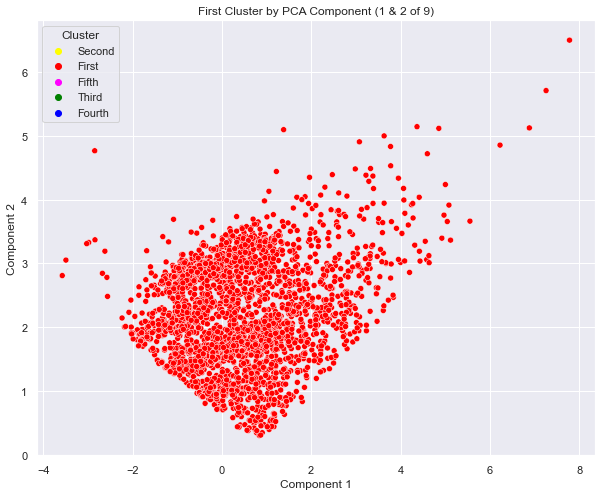

In [172]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('First Cluster by PCA Component (1 & 2 of 9)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster1_g['Component_1']
y_axis = kmeans_pca_cluster1_g['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

In [173]:
kmeans_pca_cluster1_g.shape

(2781, 20)

In [174]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster1_g = df_Bemiss_rev[df_Bemiss_rev['Kmeans_PCA_Cluster'] == 0]
df_Cluster1_g.shape

(2781, 30)

In [175]:
# View the details of the K-Means First Cluster
df_Cluster1_g.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
count       2781.000000                 2781.000000  2781.000000   
unique              NaN                         NaN          NaN   
top                 NaN                         NaN          NaN   
freq                NaN                         NaN          NaN   
mean        1034.498741                 1964.467098  2753.235886   
std          453.866274                  667.166151   517.171588   
min          690.000000                    0.000000   636.000000   
25%          774.000000                 1594.000000  2396.000000   
50%          896.000000                 1958.000000  2664.000000   
75%         1112.000000                 2338.000000  3091.000000   
max         5884.000000                10012.000000  4545.000000   

        No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
count      2781.000000      2781.000000      2781.000000  2781.000000   
unique             NaN              NaN              NaN          NaN   
top                NaN              NaN              NaN          NaN   
freq               NaN              NaN              NaN          NaN   
mean          1.861920         2.577670         1.936602     4.635383   
std           0.735771         0.599827         2.538690     0.657081   
min           0.000000         0.000000         0.119995     3.000000   
25%           1.000000         2.000000         0.390000     4.000000   
50%           2.000000         3.000000         0.830005     5.000000   
75%           2.000000         3.000000         2.500000     5.000000   
max           5.000000         5.000000        20.000000     6.000000   

        Condition_ord  Actual_Value     orig_index  Total_Garage_SF_stan  \
count     2781.000000  2.781000e+03    2781.000000           2781.000000   
unique            NaN           NaN            NaN                   NaN   
top               NaN           NaN            NaN                   NaN   
freq              NaN           NaN            NaN                   NaN   
mean         3.072636  7.443921e+05   57936.172240              0.431076   
std          0.372300  2.390187e+05   29424.134133              1.301399   
min          3.000000  2.097490e+05     105.000000             -0.556727   
25%          3.000000  5.880690e+05   48216.000000             -0.315868   
50%          3.000000  6.903230e+05   66975.000000              0.033950   
75%          3.000000  8.303230e+05   79672.000000              0.653300   
max          5.000000  2.268070e+06  101816.000000             14.336347   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       2781.000000       2781.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                           1.002458         -0.557772   
std                            0.666500          0.592679   
min                           -0.960048         -2.984124   
25%                            0.632361         -0.967164   
50%                            0.995997         -0.660036   
75%                            1.375618         -0.170694   
max                            9.041954          1.495590   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           2781.000000           2781.000000           2781.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -1.457517             -0.969077              0.168315   
std                0.681205              0.599670              0.610165   
min               -3.181356             -3.546072             -0.268301   
25%               -2.255516             -1.546596             -0.203

#### Cluster 2

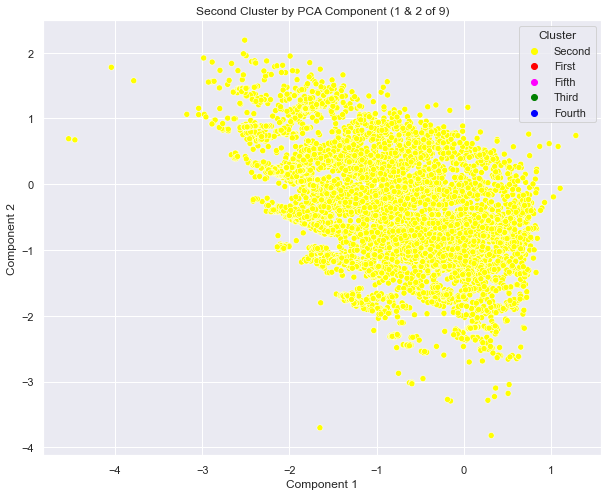

In [176]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Second Cluster by PCA Component (1 & 2 of 9)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster2_g['Component_1']
y_axis = kmeans_pca_cluster2_g['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

In [177]:
kmeans_pca_cluster2_g.shape

(8165, 20)

In [178]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster2_g = df_Bemiss_rev[df_Bemiss_rev['Kmeans_PCA_Cluster'] == 1]
df_Cluster2_g.shape

(8165, 30)

In [179]:
# View the details of the K-Means First Cluster
df_Cluster2_g.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
count       8165.000000                 8165.000000  8165.000000   
unique              NaN                         NaN          NaN   
top                 NaN                         NaN          NaN   
freq                NaN                         NaN          NaN   
mean         766.624617                  475.371709  3031.673362   
std           97.977598                  617.597944   524.620799   
min          690.000000                    0.000000     0.000000   
25%          710.000000                    0.000000  2663.000000   
50%          736.000000                    0.000000  3065.000000   
75%          786.000000                 1081.000000  3395.000000   
max         2184.000000                 2591.000000  4918.000000   

        No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
count      8165.000000      8165.000000      8165.000000  8165.000000   
unique             NaN              NaN              NaN          NaN   
top                NaN              NaN              NaN          NaN   
freq               NaN              NaN              NaN          NaN   
mean          3.759058         3.484138         0.405526     3.553582   
std           0.715209         0.700359         0.912928     0.575488   
min           0.763392         0.151418         0.045000     0.000000   
25%           3.000000         3.000000         0.172000     3.000000   
50%           4.000000         3.000000         0.207000     4.000000   
75%           4.000000         4.000000         0.280000     4.000000   
max           8.000000         6.000000        18.000000     5.000000   

        Condition_ord   Actual_Value     orig_index  Total_Garage_SF_stan  \
count     8165.000000    8165.000000    8165.000000           8165.000000   
unique            NaN            NaN            NaN                   NaN   
top               NaN            NaN            NaN                   NaN   
freq              NaN            NaN            NaN                   NaN   
mean         2.997918  491509.093325   73053.019228             -0.337016   
std          0.082052   98213.741185   19457.226860              0.280937   
min          0.000000       0.000000      29.000000             -0.556727   
25%          3.000000  420864.000000   64503.000000             -0.499380   
50%          3.000000  471734.000000   76889.000000             -0.424828   
75%          3.000000  545830.000000   86563.000000             -0.281460   
max          4.000000  977673.000000  101779.000000              3.727111   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       8165.000000       8165.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                          -0.485151         -0.238683   
std                            0.616981          0.601215   
min                           -0.960048         -3.712980   
25%                           -0.960048         -0.661182   
50%                           -0.960048         -0.200490   
75%                            0.119873          0.177690   
max                            1.628365          1.923048   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           8165.000000           8165.000000           8165.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean               0.298928             -0.062847             -0.199674   
std                0.662169              0.700175              0.219419   
min               -2.474578             -3.394693             -0.286325   
25%               -0.403838             -0.546858       

#### Cluster 3

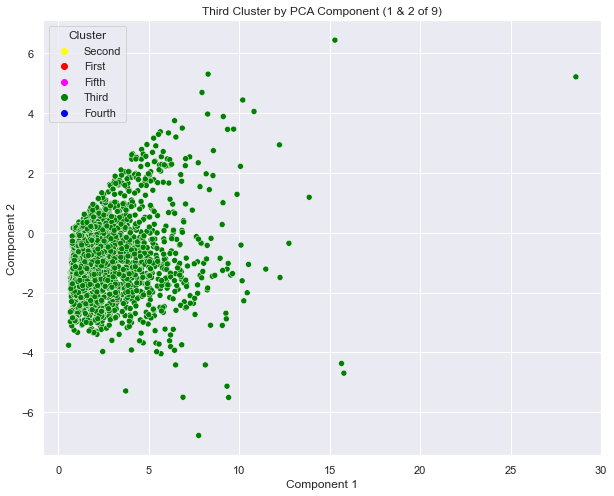

In [180]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Third Cluster by PCA Component (1 & 2 of 9)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster3_g['Component_1']
y_axis = kmeans_pca_cluster3_g['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

In [181]:
kmeans_pca_cluster3_g.shape

(2875, 20)

In [182]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster3_g = df_Bemiss_rev[df_Bemiss_rev['Kmeans_PCA_Cluster'] == 2]
df_Cluster3_g.shape

(2875, 30)

In [183]:
# View the details of the K-Means First Cluster
df_Cluster3_g.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Total_Garage_SF  Total_Finished_Basement_SF   Built_as_SF  \
count       2875.000000                 2875.000000   2875.000000   
unique              NaN                         NaN           NaN   
top                 NaN                         NaN           NaN   
freq                NaN                         NaN           NaN   
mean        1080.315478                 1597.901913   4428.913043   
std          488.027071                 1065.411278    927.764628   
min          690.000000                    0.000000   1798.000000   
25%          805.000000                 1129.000000   3858.000000   
50%          942.000000                 1700.000000   4266.000000   
75%         1184.000000                 2139.000000   4721.000000   
max         7448.000000                10501.000000  15012.000000   

        No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
count      2875.000000      2875.000000      2875.000000  2875.000000   
unique             NaN              NaN              NaN          NaN   
top                NaN              NaN              NaN          NaN   
freq               NaN              NaN              NaN          NaN   
mean          4.105919         4.712537         1.335957     5.078261   
std           0.789180         0.869643         2.092994     0.560033   
min           1.000000         2.000000         0.150000     3.000000   
25%           4.000000         4.000000         0.330000     5.000000   
50%           4.000000         5.000000         0.546006     5.000000   
75%           5.000000         5.000000         1.270000     5.000000   
max           8.000000         9.000000        18.357000     6.000000   

        Condition_ord  Actual_Value     orig_index  Total_Garage_SF_stan  \
count     2875.000000  2.875000e+03    2875.000000           2875.000000   
unique            NaN           NaN            NaN                   NaN   
top               NaN           NaN            NaN                   NaN   
freq              NaN           NaN            NaN                   NaN   
mean         3.056348  9.896010e+05   68224.961043              0.562449   
std          0.330996  4.182488e+05   18710.103189              1.399350   
min          3.000000  4.286930e+05     297.000000             -0.556727   
25%          3.000000  7.610415e+05   59797.500000             -0.226980   
50%          3.000000  8.917800e+05   71129.000000              0.165848   
75%          3.000000  1.078597e+06   81137.500000              0.859750   
max          5.000000  7.560927e+06  101805.000000             18.820900   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       2875.000000       2875.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                           0.636259          1.362554   
std                            1.064347          1.063218   
min                           -0.960048         -1.652472   
25%                            0.167825          0.708288   
50%                            0.738255          1.175856   
75%                            1.176816          1.697286   
max                            9.530466         13.490772   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           2875.000000           2875.000000           2875.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean               0.620065              1.165230              0.023952   
std                0.730654              0.869415              0.503044   
min               -2.255516             -1.546596             -0.261089   
25%                0.522001              0.452880       

#### Cluster 4

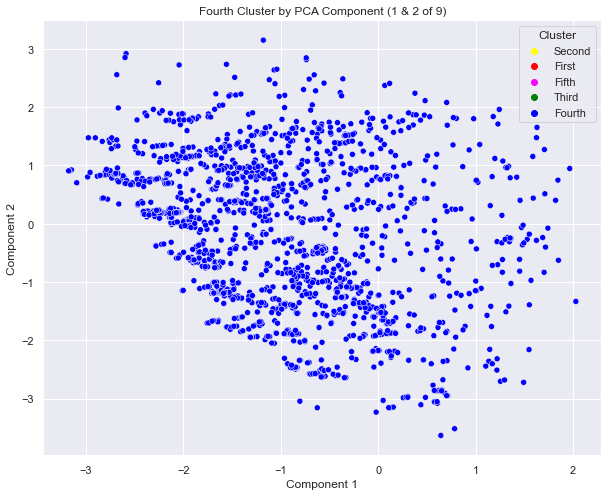

In [184]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fourth Cluster by PCA Component (1 & 2 of 9)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster4_g['Component_1']
y_axis = kmeans_pca_cluster4_g['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

In [185]:
kmeans_pca_cluster4_g.shape

(1824, 20)

In [186]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster4_g = df_Bemiss_rev[df_Bemiss_rev['Kmeans_PCA_Cluster'] == 3]
df_Cluster4_g.shape

(1824, 30)

In [187]:
# View the details of the K-Means First Cluster
df_Cluster4_g.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  \
count       1824.000000                 1824.000000  1824.000000   
unique              NaN                         NaN          NaN   
top                 NaN                         NaN          NaN   
freq                NaN                         NaN          NaN   
mean         813.954496                  517.979715  2980.991228   
std          173.562772                  773.505021   659.906830   
min          690.000000                    0.000000  1148.000000   
25%          712.000000                    0.000000  2420.000000   
50%          745.000000                    0.000000  2910.500000   
75%          851.750000                 1306.000000  3488.000000   
max         2520.000000                 3095.000000  5283.000000   

        No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
count      1824.000000      1824.000000      1824.000000  1824.000000   
unique             NaN              NaN              NaN          NaN   
top                NaN              NaN              NaN          NaN   
freq               NaN              NaN              NaN          NaN   
mean          3.392573         3.461509         0.473769     3.491228   
std           0.943890         0.934499         1.020776     0.585929   
min           1.000000         0.400000         0.045000     3.000000   
25%           3.000000         3.000000         0.172000     3.000000   
50%           3.000000         3.000000         0.202500     3.000000   
75%           4.000000         4.000000         0.277000     4.000000   
max           6.000000         6.000000        13.500000     5.000000   

        Condition_ord  Actual_Value     orig_index  Total_Garage_SF_stan  \
count     1824.000000  1.824000e+03    1824.000000           1824.000000   
unique            NaN           NaN            NaN                   NaN   
top               NaN           NaN            NaN                   NaN   
freq              NaN           NaN            NaN                   NaN   
mean         4.999452  5.591240e+05   89820.287829             -0.201304   
std          0.023415  1.482125e+05   18424.003030              0.497667   
min          4.000000  1.680550e+05     342.000000             -0.556727   
25%          5.000000  4.508558e+05   88098.750000             -0.493645   
50%          5.000000  5.280690e+05   95653.000000             -0.399022   
75%          5.000000  6.215335e+05   98196.750000             -0.092931   
max          5.000000  1.172119e+06  101794.000000              4.690544   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                       1824.000000       1824.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                          -0.442585         -0.296764   
std                            0.772733          0.756253   
min                           -0.960048         -2.397372   
25%                           -0.960048         -0.939660   
50%                           -0.960048         -0.377547   
75%                            0.344648          0.284268   
max                            2.131862          2.341338   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count           1824.000000           1824.000000           1824.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -0.040379             -0.085469             -0.183272   
std                0.873890              0.934254              0.245340   
min               -2.255516             -3.146177             -0.286325   
25%               -0.403838             -0.546858             -0.255

#### Cluster 5

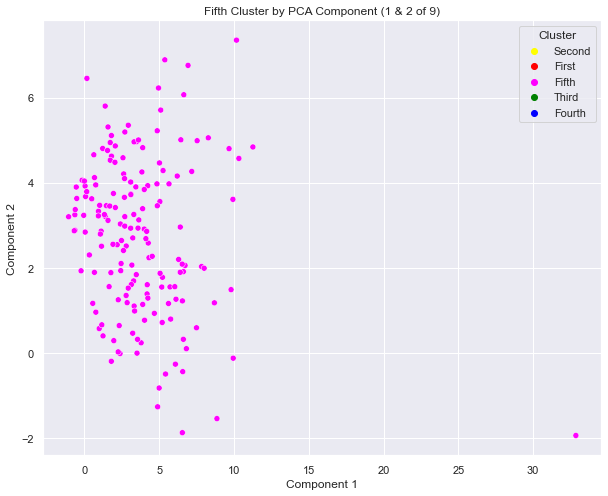

In [188]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fifth Cluster by PCA Component (1 & 2 of 9)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster5_g['Component_1']
y_axis = kmeans_pca_cluster5_g['Component_2']


# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm_g['Cluster'], palette = color_dict)

plt.show()

In [189]:
kmeans_pca_cluster5_g.shape

(170, 20)

In [190]:
# Create a dataframe for cluster 1 with all data (raw, stan, Pca, etc...)
df_Cluster5_g = df_Bemiss_rev[df_Bemiss_rev['Kmeans_PCA_Cluster'] == 4]
df_Cluster5_g.shape

(170, 30)

In [191]:
# View the details of the K-Means First Cluster
df_Cluster5_g.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Total_Garage_SF  Total_Finished_Basement_SF   Built_as_SF  \
count        170.000000                  170.000000    170.000000   
unique              NaN                         NaN           NaN   
top                 NaN                         NaN           NaN   
freq                NaN                         NaN           NaN   
mean        1505.876471                 1852.782353   3876.241176   
std         1009.208438                 2116.337731   1746.580302   
min          701.000000                    0.000000   1216.000000   
25%          895.500000                    0.000000   2786.250000   
50%         1201.000000                 1877.500000   3560.500000   
75%         1717.250000                 2617.000000   4660.750000   
max         7745.000000                22450.000000  16807.000000   

        No_of_Bedrooms  No_of_Bathrooms  Total_Net_Acres  Quality_ord  \
count       170.000000       170.000000       170.000000   170.000000   
unique             NaN              NaN              NaN          NaN   
top                NaN              NaN              NaN          NaN   
freq               NaN              NaN              NaN          NaN   
mean          2.823529         3.629412        36.178137     4.935294   
std           1.227654         1.698682        10.580096     0.884743   
min           1.000000         1.000000         7.919995     3.000000   
25%           2.000000         3.000000        35.000000     4.000000   
50%           3.000000         3.000000        35.024000     5.000000   
75%           4.000000         4.000000        36.497995     6.000000   
max           8.000000        18.000000        99.277000     6.000000   

        Condition_ord  Actual_Value     orig_index  Total_Garage_SF_stan  \
count      170.000000  1.700000e+02     170.000000            170.000000   
unique            NaN           NaN            NaN                   NaN   
top               NaN           NaN            NaN                   NaN   
freq              NaN           NaN            NaN                   NaN   
mean         3.152941  9.748916e+05   49601.188235              1.782686   
std          0.575761  5.008764e+05   22868.857610              2.893765   
min          1.000000  2.955490e+05     114.000000             -0.525186   
25%          3.000000  6.783708e+05   37167.000000              0.032516   
50%          3.000000  8.591805e+05   49092.500000              0.908495   
75%          3.000000  1.165690e+06   64676.500000              2.388770   
max          5.000000  4.240026e+06  101474.000000             19.672506   

        Total_Finished_Basement_SF_stan  Built_as_SF_stan  \
count                        170.000000        170.000000   
unique                              NaN               NaN   
top                                 NaN               NaN   
freq                                NaN               NaN   
mean                           0.890885          0.729192   
std                            2.114224          2.001581   
min                           -0.960048         -2.319444   
25%                           -0.960048         -0.519938   
50%                            0.915578          0.367353   
75%                            1.654339          1.628239   
max                           21.467533         15.547842   

        No_of_Bedrooms_stan  No_of_Bathrooms_stan  Total_Net_Acres_stan  \
count            170.000000            170.000000            170.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean              -0.567222              0.082389              8.398146   
std                1.136611              1.698237              2.542889   
min               -2.255516             -2.546334              1.606402   
25%               -1.329677             -0.546858       

### Write File for MLRegression and Geocoding

In [192]:
df_Bemiss_rev.head()

Total_Garage_SF  Total_Finished_Basement_SF  Built_as_SF  No_of_Bedrooms  \
0           1007.0                      1152.0       2649.0             3.0   
1            786.0                         0.0       4345.0             3.0   
2            936.0                         0.0       2599.0             3.0   
3           1464.0                         0.0       2260.0             3.0   
4           1844.0                      1552.0       1941.0             2.0   

   No_of_Bathrooms  Total_Net_Acres  Quality_ord  Condition_ord  Actual_Value  \
0              3.0         1.880005          3.0            3.0      528012.0   
1              3.0         2.389991          4.0            3.0      646822.0   
2              3.0         1.000000          3.0            3.0      432353.0   
3              2.0         1.019995          4.0            3.0      498921.0   
4              3.0         1.037006          4.0            3.0      584144.0   

   orig_index  Total_Garage_SF_stan  Total_Finished_Basement_SF_stan  \
0          29              0.352227                         0.190802   
1          35             -0.281460                        -0.960048   
2          52              0.148644                        -0.960048   
3          86              1.662611                        -0.960048   
4         105              2.752208                         0.590403   

   Built_as_SF_stan  No_of_Bedrooms_stan  No_of_Bathrooms_stan  \
0         -0.677226            -0.403838             -0.546858   
1          1.266390            -0.403838             -0.546858   
2         -0.734526            -0.403838             -0.546858   
3         -1.123020            -0.403838             -1.546596   
4         -1.488594            -1.329677             -0.546858   

   Total_Net_Acres_stan  Quality_ord_stan  Condition_ord_stan  \
0              0.154712         -1.168108           -0.379098   
1              0.277285         -0.032527           -0.379098   
2             -0.056794         -1.168108           -0.379098   
3             -0.051989         -0.032527           -0.379098   
4             -0.047900         -0.032527           -0.379098   

   Actual_Value_stan  Component_1  Component_2  Component_3  Component_4  \
0          -0.372723    -0.939476     0.734813    -0.216981     0.429883   
1           0.024409     0.013881    -0.190185    -0.259084     0.400643   
2          -0.692470    -1.630621     0.264146    -0.197099     0.566511   
3          -0.469962    -0.948682     1.398034    -0.071539     0.677467   
4          -0.185097     0.206438     2.329217     0.065250     0.381818   

   Component_5  Component_6  Component_7  Component_8  Component_9  \
0     0.616099     0.704506     0.408460    -0.206646     0.111356   
1    -0.161116    -0.963760     0.895641     0.000730    -1.126091   
2     0.758490    -0.173594     0.413371    -0.262299     0.052789   
3     1.817452    -0.784683    -0.303848     0.734354     0.038572   
4     2.361174     0.254894    -0.731774    -0.481514     0.601819   

   Kmeans_PCA_Cluster Cluster  
0                   1  Second  
1                   1  Second  
2                   1  Second  
3                   1  Second  
4                   0   First

In [193]:
#### Write to a file 
df_Bemiss_rev.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_Property_Analys_sm.csv')